# 数据分析

###  读写文件

应用统计学是建立在数据的基础上，因此常常和数据打交道，一般获取数据的方法有：

- 手动输入
- 读写数据文件

一般情况下变量与数据量很多，手动输入数据来建立数据集时不可取的，需要读取数据文件，其来源包括：

- R的内置数据包dataset，可以通过`data()` 函数查看或者加载这些数据集。
- 外部录入数据，如电子表格、数据库、文本文件等，需要掌握R语言录入数据的方法。

Excel是目前数据管理和编辑十分方便的软件，在此仅讲解R语言与Excel表格打交道，实际还可以读取其余统计软件的数据文件、数据库数据等。

读取Excel文档的方法有：

- 保存为CSV文本文件，利用 `read.csv()`读取文件， `write.csv()`输出文件
- 借助于剪贴板，利用`read.table("clipboard", header=T)`读取，`write.table(..., file="clipboard")`输出
- 利用RODBC程序包直接读取，该包使用开放数据库连接（Open Database Connectivity,ODBC）驱动作为一种连接到数据库管理系统（DBMS）的方法，要求用户必须先安装和配置必要的驱动程序，然后才能在R中使用它。在不同平台和很多有种DBMS都有可用的ODBC驱动程序。它们甚至还能针对根本不是数据库的数据存储格式，如CSV或XLS/XLSX。


In [28]:
d.dates <- read.csv('./materials/dates.csv')
print(d.dates)
class(d.dates)

write.csv(d.dates, file='./materials/dates2.csv',row.names=FALSE)

   序号  出生日期 发病日期
1     1  1941/3/8 2007/1/1
2     2 1972/1/24 2007/1/1
3     3  1932/6/1 2007/1/1
4     4 1947/5/17 2007/1/1
5     5 1943/3/10 2007/1/1
6     6  1940/1/8 2007/1/1
7     7  1947/8/5 2007/1/1
8     8 2005/4/14 2007/1/1
9     9 1961/6/23 2007/1/2
10   10 1949/1/10 2007/1/2


[1] "data.frame"

In [14]:
d.dates2<-read.table("clipboard", header=T)
print(d.dates2)
class(d.dates2)

write.table(d.dates2[1:5,], "clipboard", sep = "\t", col.names = NA)

   序号  出生日期 发病日期
1     1  1941/3/8 2007/1/1
2     2 1972/1/24 2007/1/1
3     3  1932/6/1 2007/1/1
4     4 1947/5/17 2007/1/1
5     5 1943/3/10 2007/1/1
6     6  1940/1/8 2007/1/1
7     7  1947/8/5 2007/1/1
8     8 2005/4/14 2007/1/1
9     9 1961/6/23 2007/1/2
10   10 1949/1/10 2007/1/2


[1] "data.frame"

In [9]:
install.packages("RODBC")

package 'RODBC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lixinpeng\AppData\Local\Temp\RtmpkR9uNm\downloaded_packages


In [26]:
library(RODBC)

# 读取
con <- odbcConnectExcel('./materials/dates.csv', readOnly=FALSE)
d.dates3<-sqlFetch(con, sqtable="序号")
close(con)
print(d.dates3)

# 保存
con <- odbcConnectExcel('./materials/dates.csv', readOnly=FALSE)
res <- sqlSave(con, d.dates3, tablename="序号", rownames=F, colnames=F, safer=T)
close(con)


Warning message in odbcDriverConnect(con, tabQuote = c("[", "]"), ...):
"[RODBC] ERROR: state IM002, code 0, message [Microsoft][ODBC 驱动程序管理器] 未发现数据源名称并且未指定默认驱动程序"Warning message in odbcDriverConnect(con, tabQuote = c("[", "]"), ...):
"ODBC connection failed"

ERROR: Error in sqlFetch(con, sqtable = "序号"): first argument is not an open RODBC channel


在读取数据之后，对数据进行预览或者检查。常用的几个函数有：

- `head()` 展示前几个数据
- `tail()` 展示后几个数据
- `summary()` 获取描述性统计量
- `table()` 统计频次
- `str()` 以简洁的方式显示对象的数据结构及内容，structure的缩写

In [29]:
print(is.data.frame(d.dates))
print(ncol(d.dates))
print(nrow(d.dates))
print(object.size(d.dates))

[1] TRUE
[1] 3
[1] 10
1904 bytes


In [7]:
head(d.dates)

序号,出生日期,发病日期
1,1941/3/8,2007/1/1
2,1972/1/24,2007/1/1
3,1932/6/1,2007/1/1
4,1947/5/17,2007/1/1
5,1943/3/10,2007/1/1
6,1940/1/8,2007/1/1


In [8]:
tail(d.dates)

,序号,出生日期,发病日期
5,5,1943/3/10,2007/1/1
6,6,1940/1/8,2007/1/1
7,7,1947/8/5,2007/1/1
8,8,2005/4/14,2007/1/1
9,9,1961/6/23,2007/1/2
10,10,1949/1/10,2007/1/2


In [10]:
summary(d.dates)

      序号            出生日期     发病日期
 Min.   : 1.00   1932/6/1 :1   2007/1/1:8  
 1st Qu.: 3.25   1940/1/8 :1   2007/1/2:2  
 Median : 5.50   1941/3/8 :1               
 Mean   : 5.50   1943/3/10:1               
 3rd Qu.: 7.75   1947/5/17:1               
 Max.   :10.00   1947/8/5 :1               
                 (Other)  :4               

In [17]:
table(d.dates$发病日期)


2007/1/1 2007/1/2 
       8        2 

In [19]:
str(d.dates)

'data.frame':	10 obs. of  3 variables:
 $ 序号    : int  1 2 3 4 5 6 7 8 9 10
 $ 出生日期: Factor w/ 10 levels "1932/6/1","1940/1/8",..: 3 9 1 5 4 2 6 10 8 7
 $ 发病日期: Factor w/ 2 levels "2007/1/1","2007/1/2": 1 1 1 1 1 1 1 1 2 2


### 绘图

在获取数据之后，则是进行数据分析，我们最为关心的是变量之间的关系，简单的二元关系有科技投入与经济增长之间的关系、广告投入和经济效益之间的关系等，复杂的多元关系有企业的固定资产、流动资产、预算分配等。

在了解复杂的多元统计分析之前，先了解最简单的分析方法：绘图。R语言的前身是S语言，S语言的设计目的就是交互式数据分析、绘图，所以R的绘图功能十分强大，如`lattice`、`ggplot2`。


从所绘图形的类型来看，可以分成两类:

- 一类是所谓的一般图形，如散点图、二维曲线、三维曲线和二维等值线等；
- 另一类图形与统计内容有关，如饼图、直方图、箱线图和QQ图，以及回归诊断图等。

从绘图函数来看，共有三种基本类型：
- 高级绘图函数
- 低级绘图函数
- 交互式绘图函数

R提供了多种绘图函数，他们可以完成各种类型的图形绘制，可以用`demo()`命令来延时常用绘图函数的功能以及相应的使用方法。




	demo(graphics)
	---- ~~~~~~~~

> #  Copyright (C) 1997-2009 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## Here is some code which illustrates some of the differences between
> ## R and S graphics capabilities.  Note that colors are generally specified
> ## by a character string name (taken from the X11 rgb.txt file) and that line
> ## textures are given similarly.  The parameter "bg" sets the background
> ## parameter for the plot and there is also an "fg" parameter which sets
> ## the foreground color.
> 
> 
> x <- stats::rnorm(50)

> opar <- par(bg = "white")

> plot(x, ann = FALSE, type = "n")

> abline(h = 0, col = gray(.90))

> lines(x, col = "green4", lty = "dotted")

> points(x, bg = "limegreen", pch = 21)

> title(main = "Simple Use of Color In a Plot",
+       xlab = "Just a Whisper of a Label",
+       col.main = "blue", col.lab = gray(.8),
+       cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

> ## A little color wheel

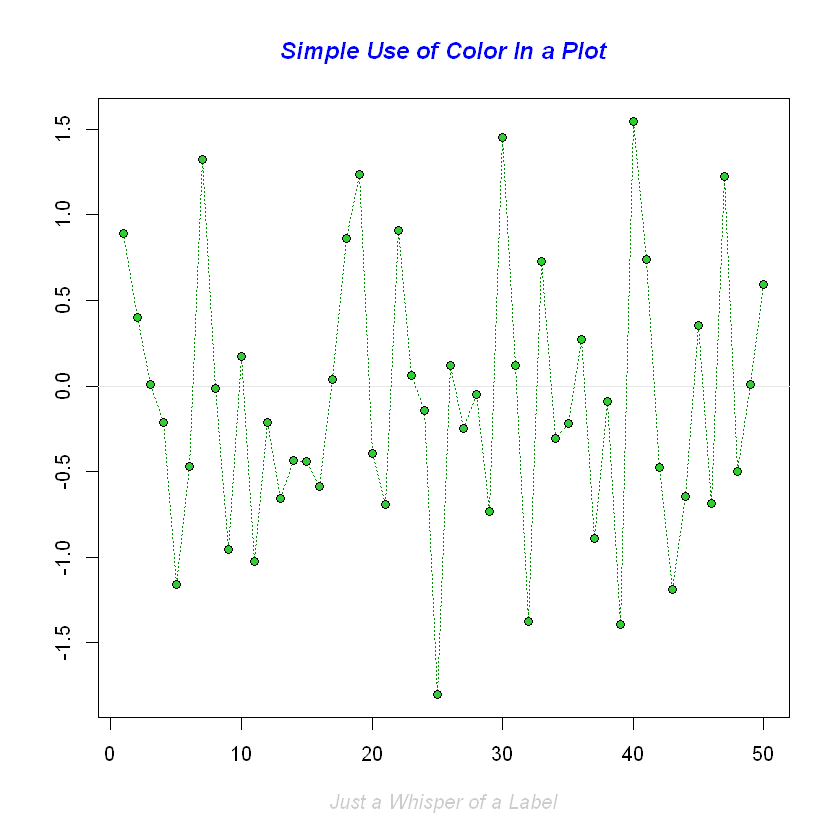


> title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3)

> title(xlab = "(Use this as a test of monitor linearity)",
+       cex.lab = 0.8, font.lab = 3)

> ## We have already confessed to having these.  This is just showing off X11
> ## color names (and the example (from the postscript manual) is pretty "cute".
> 
> pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)

> names(pie.sales) <- c("Blueberry", "Cherry",
+ 		      "Apple", "Boston Cream", "Other", "Vanilla Cream")

> pie(pie.sales,
+     col = c("purple","violetred1","green3","cornsilk","cyan","white"))


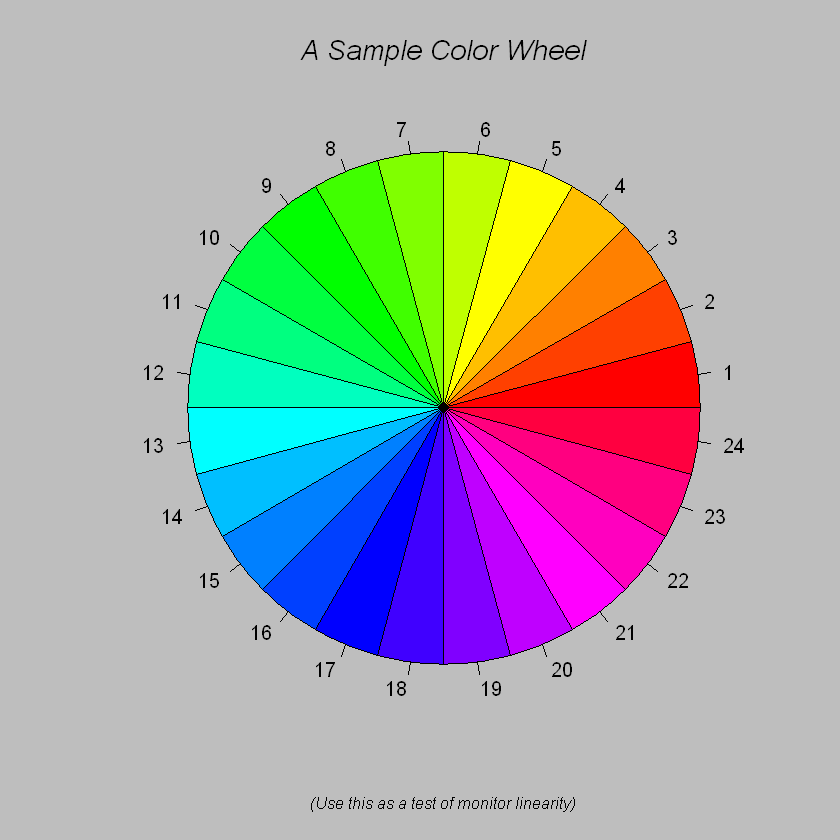


> title(main = "January Pie Sales", cex.main = 1.8, font.main = 1)

> title(xlab = "(Don't try this at home kids)", cex.lab = 0.8, font.lab = 3)

> ## Boxplots:  I couldn't resist the capability for filling the "box".
> ## The use of color seems like a useful addition, it focuses attention
> ## on the central bulk of the data.
> 
> par(bg="cornsilk")

> n <- 10

> g <- gl(n, 100, n*100)

> x <- rnorm(n*100) + sqrt(as.numeric(g))

> boxplot(split(x,g), col="lavender", notch=TRUE)


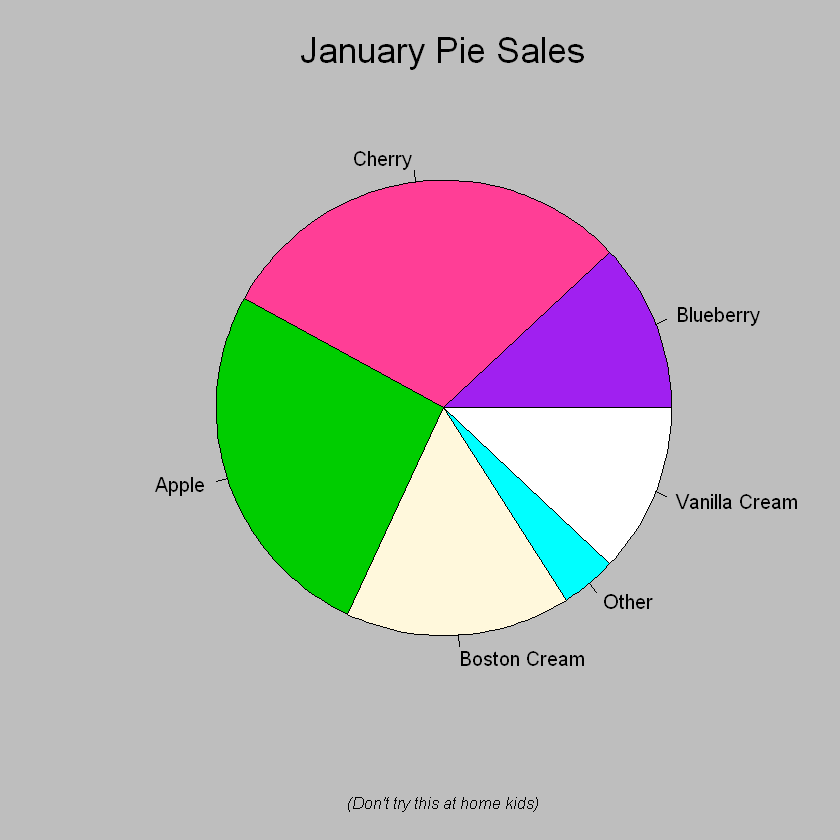


> title(main="Notched Boxplots", xlab="Group", font.main=4, font.lab=1)

> ## An example showing how to fill between curves.
> 
> par(bg="white")

> n <- 100

> x <- c(0,cumsum(rnorm(n)))

> y <- c(0,cumsum(rnorm(n)))

> xx <- c(0:n, n:0)

> yy <- c(x, rev(y))

> plot(xx, yy, type="n", xlab="Time", ylab="Distance")


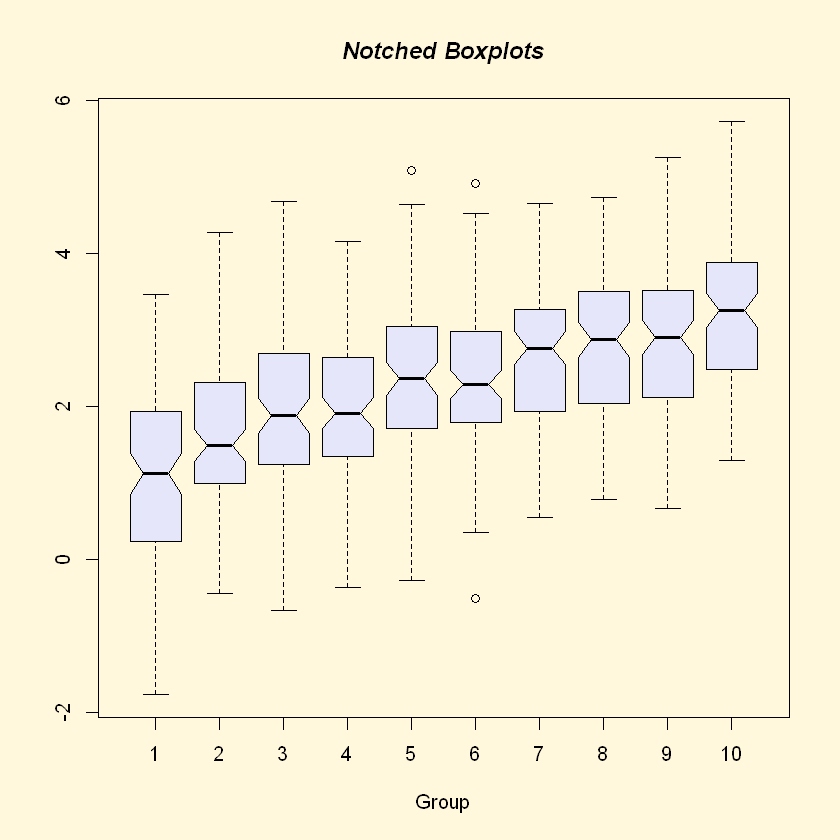


> polygon(xx, yy, col="gray")

> title("Distance Between Brownian Motions")

> ## Colored plot margins, axis labels and titles.	 You do need to be
> ## careful with these kinds of effects.	It's easy to go completely
> ## over the top and you can end up with your lunch all over the keyboard.
> ## On the other hand, my market research clients love it.
> 
> x <- c(0.00, 0.40, 0.86, 0.85, 0.69, 0.48, 0.54, 1.09, 1.11, 1.73, 2.05, 2.02)

> par(bg="lightgray")

> plot(x, type="n", axes=FALSE, ann=FALSE)


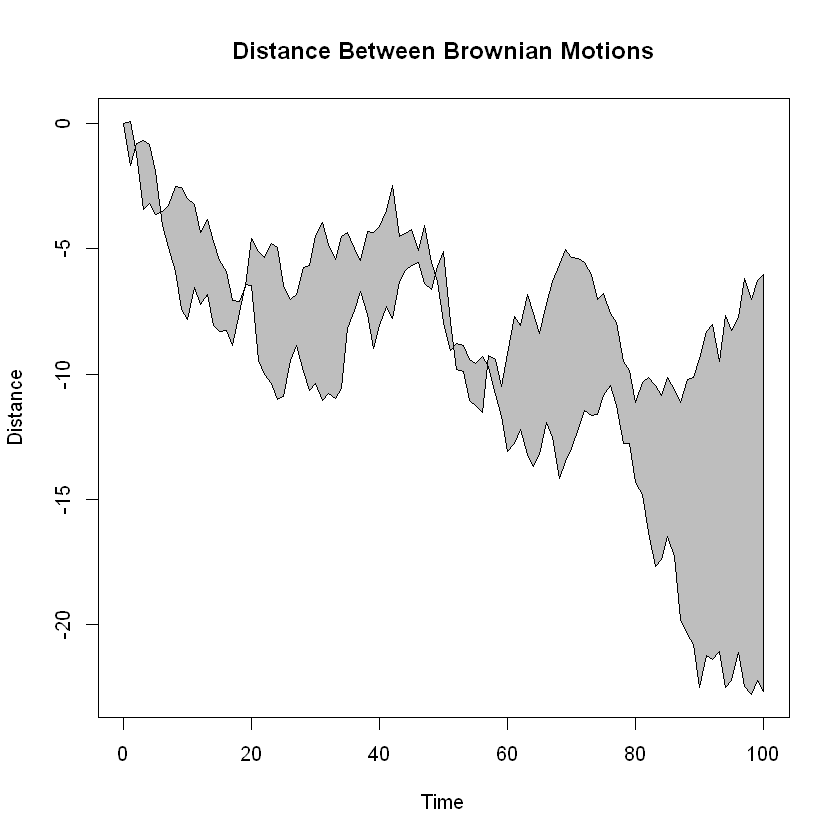


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="cornsilk", border="black")

> lines(x, col="blue")

> points(x, pch=21, bg="lightcyan", cex=1.25)

> axis(2, col.axis="blue", las=1)

> axis(1, at=1:12, lab=month.abb, col.axis="blue")

> box()

> title(main= "The Level of Interest in R", font.main=4, col.main="red")

> title(xlab= "1996", col.lab="red")

> ## A filled histogram, showing how to change the font used for the
> ## main title without changing the other annotation.
> 
> par(bg="cornsilk")

> x <- rnorm(1000)

> hist(x, xlim=range(-4, 4, x), col="lavender", main="")


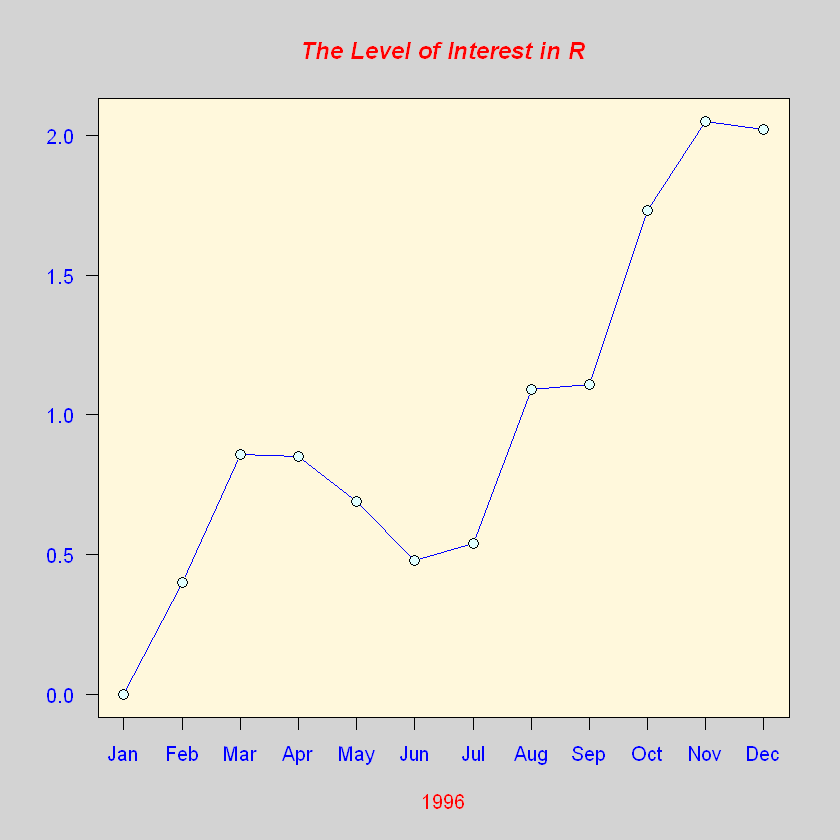


> title(main="1000 Normal Random Variates", font.main=3)

> ## A scatterplot matrix
> ## The good old Iris data (yet again)
> 
> pairs(iris[1:4], main="Edgar Anderson's Iris Data", font.main=4, pch=19)


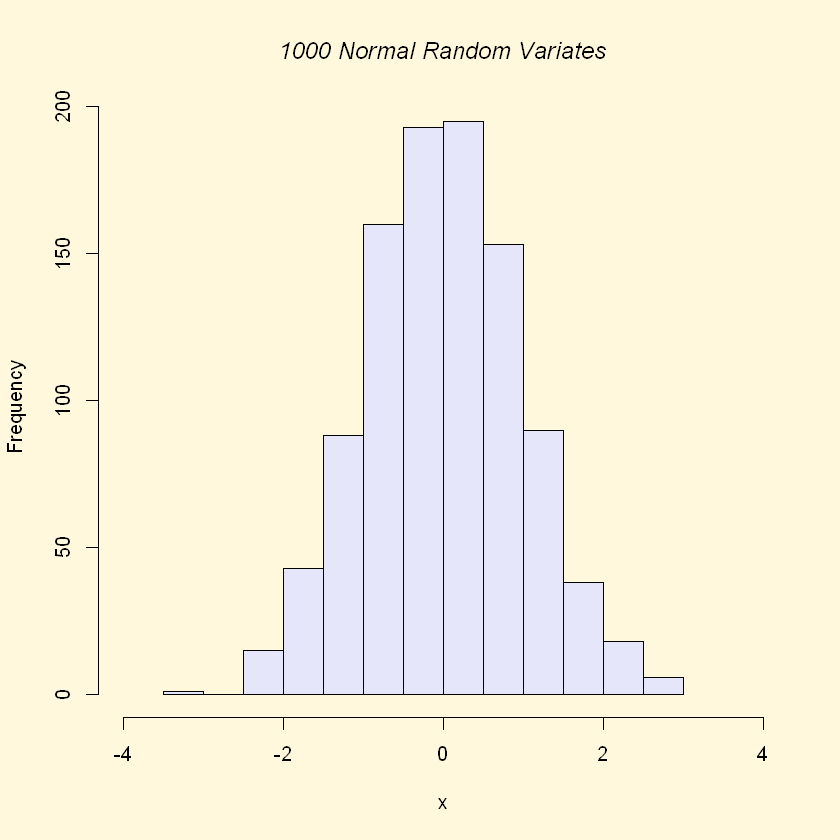


> pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
+       bg = c("red", "green3", "blue")[unclass(iris$Species)])


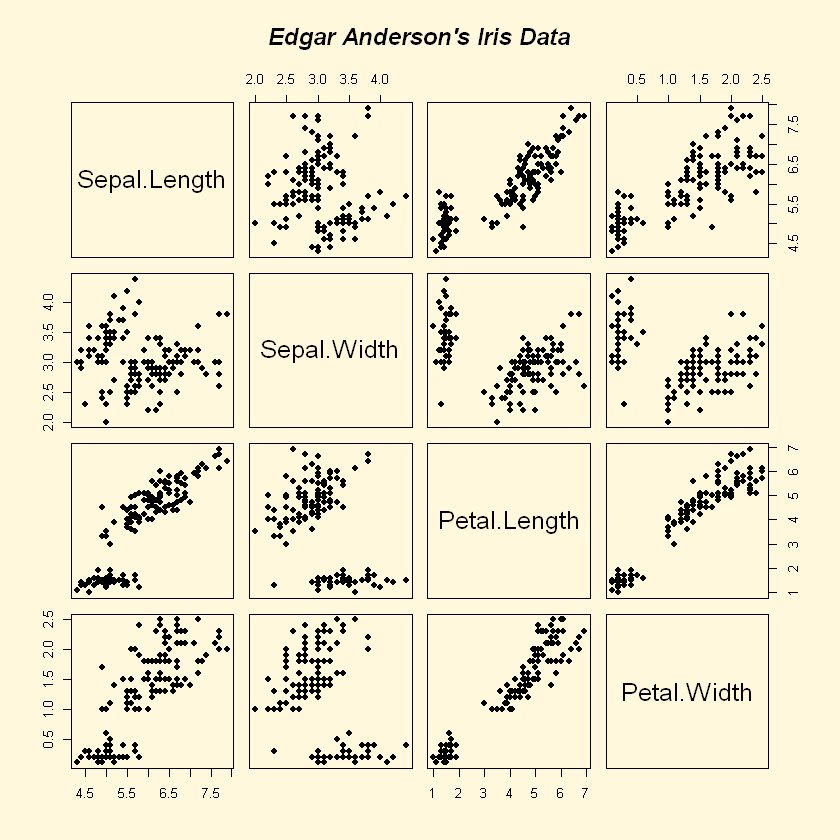


> ## Contour plotting
> ## This produces a topographic map of one of Auckland's many volcanic "peaks".
> 
> x <- 10*1:nrow(volcano)

> y <- 10*1:ncol(volcano)

> lev <- pretty(range(volcano), 10)

> par(bg = "lightcyan")

> pin <- par("pin")

> xdelta <- diff(range(x))

> ydelta <- diff(range(y))

> xscale <- pin[1]/xdelta

> yscale <- pin[2]/ydelta

> scale <- min(xscale, yscale)

> xadd <- 0.5*(pin[1]/scale - xdelta)

> yadd <- 0.5*(pin[2]/scale - ydelta)

> plot(numeric(0), numeric(0),
+      xlim = range(x)+c(-1,1)*xadd, ylim = range(y)+c(-1,1)*yadd,
+      type = "n", ann = FALSE)


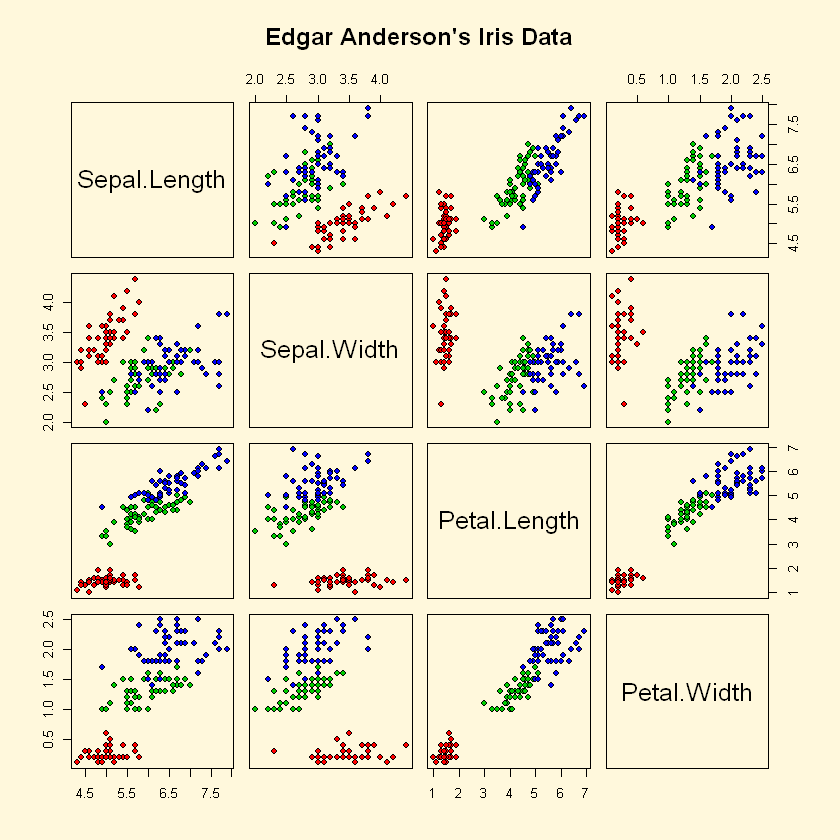


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="green3")

> contour(x, y, volcano, levels = lev, col="yellow", lty="solid", add=TRUE)

> box()

> title("A Topographic Map of Maunga Whau", font= 4)

> title(xlab = "Meters North", ylab = "Meters West", font= 3)

> mtext("10 Meter Contour Spacing", side=3, line=0.35, outer=FALSE,
+       at = mean(par("usr")[1:2]), cex=0.7, font=3)

> ## Conditioning plots
> 
> par(bg="cornsilk")

> coplot(lat ~ long | depth, data = quakes, pch = 21, bg = "green3")


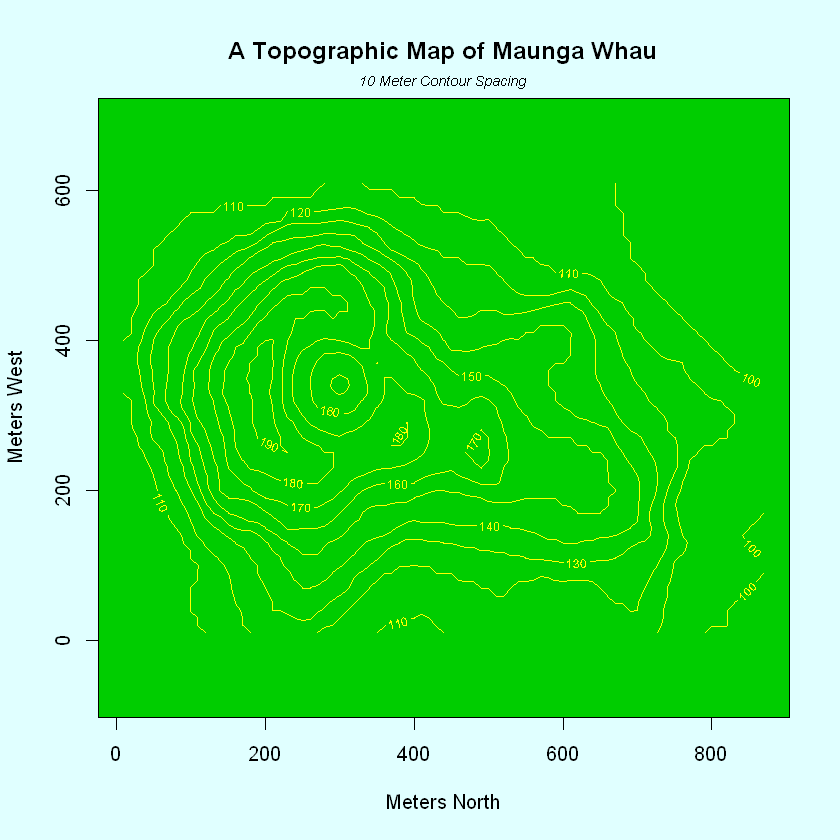


> par(opar)


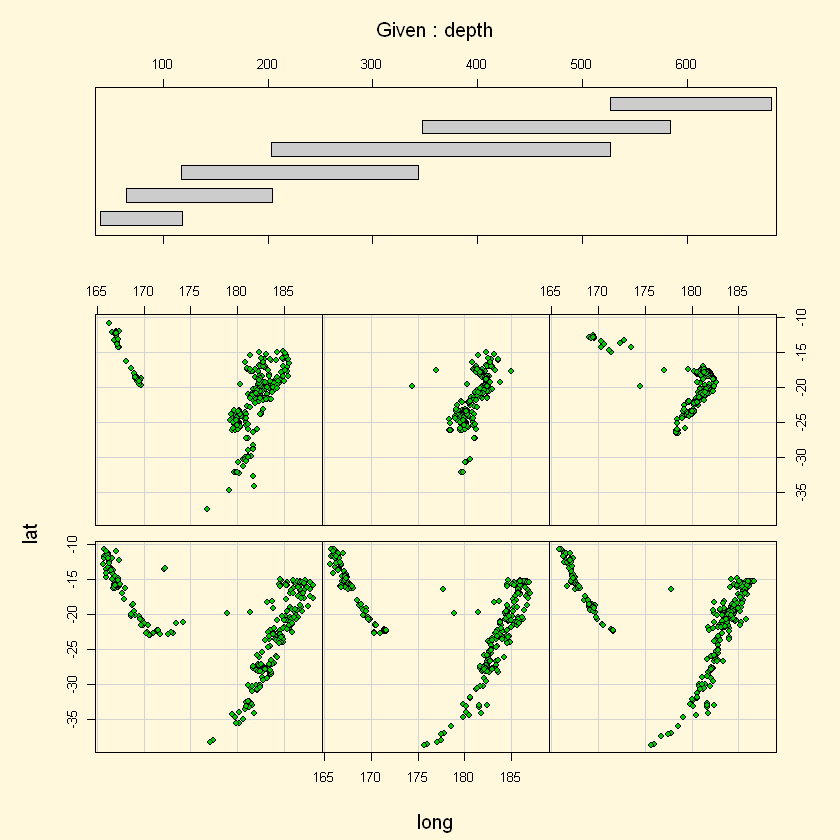

In [30]:
demo(graphics)



	demo(image)
	---- ~~~~~

> #  Copyright (C) 1997-2009 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> x <- 10*(1:nrow(volcano)); x.at <- seq(100, 800, by=100)

> y <- 10*(1:ncol(volcano)); y.at <- seq(100, 600, by=100)

> 					# Using Terrain Colors
> 
> image(x, y, volcano, col=terrain.colors(100),axes=FALSE)

> contour(x, y, volcano, levels=seq(90, 200, by=5), add=TRUE, col="brown")

> axis(1, at=x.at)

> axis(2, at=y.at)

> box()

> title(main="Maunga Whau Volcano", sub = "col=terrain.colors(100)", font.main=4)

> 					# Using Heat Colors
> 
> image(x, y, volcano, col=heat.colors(100), axes=FALSE)


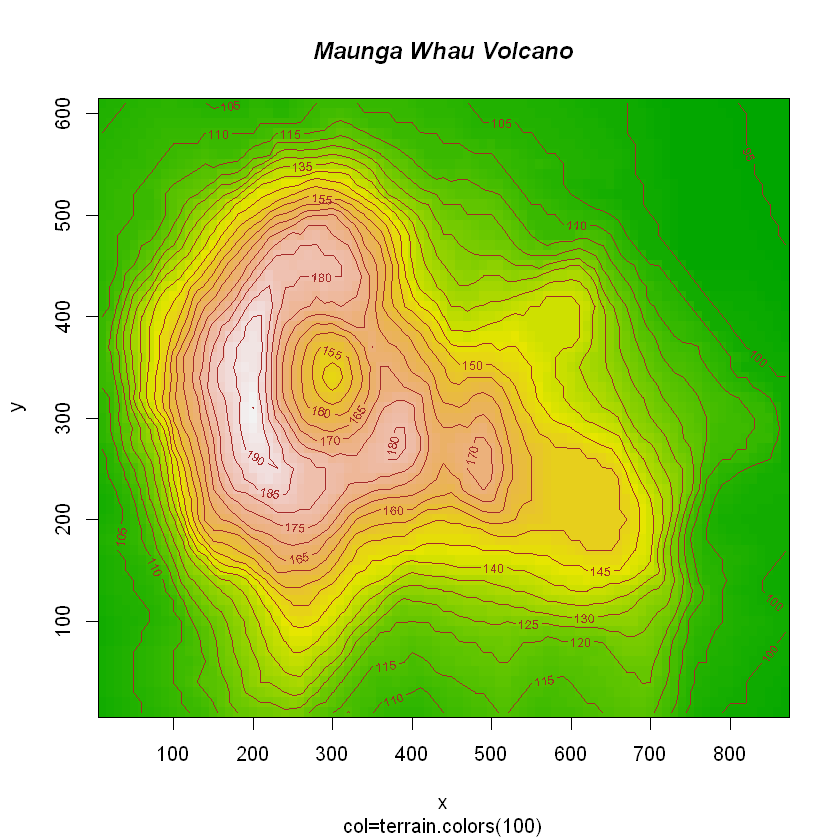


> contour(x, y, volcano, levels=seq(90, 200, by=5), add=TRUE, col="brown")

> axis(1, at=x.at)

> axis(2, at=y.at)

> box()

> title(main="Maunga Whau Volcano", sub = "col=heat.colors(100)", font.main=4)

> 					# Using Gray Scale
> 
> image(x, y, volcano, col=gray(100:200/200), axes=FALSE)


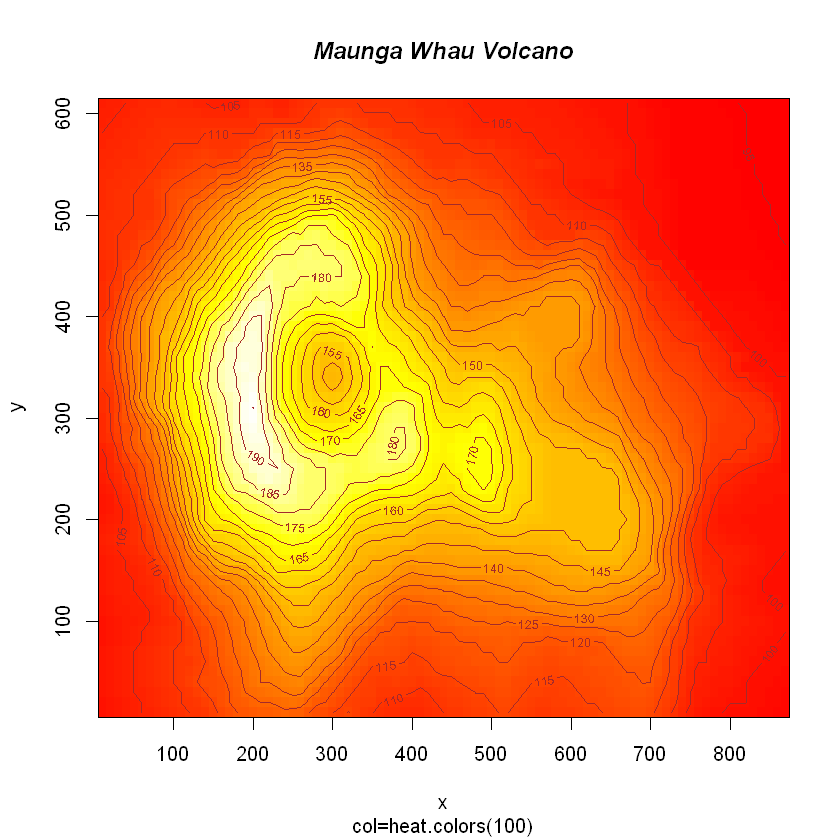


> contour(x, y, volcano, levels=seq(90, 200, by=5), add=TRUE, col="black")

> axis(1, at=x.at)

> axis(2, at=y.at)

> box()

> title(main="Maunga Whau Volcano \n col=gray(100:200/200)", font.main=4)

> ## Filled Contours are even nicer sometimes :
> example(filled.contour)

flld.c> require(grDevices) # for colours

flld.c> filled.contour(volcano, color = terrain.colors, asp = 1) # simple


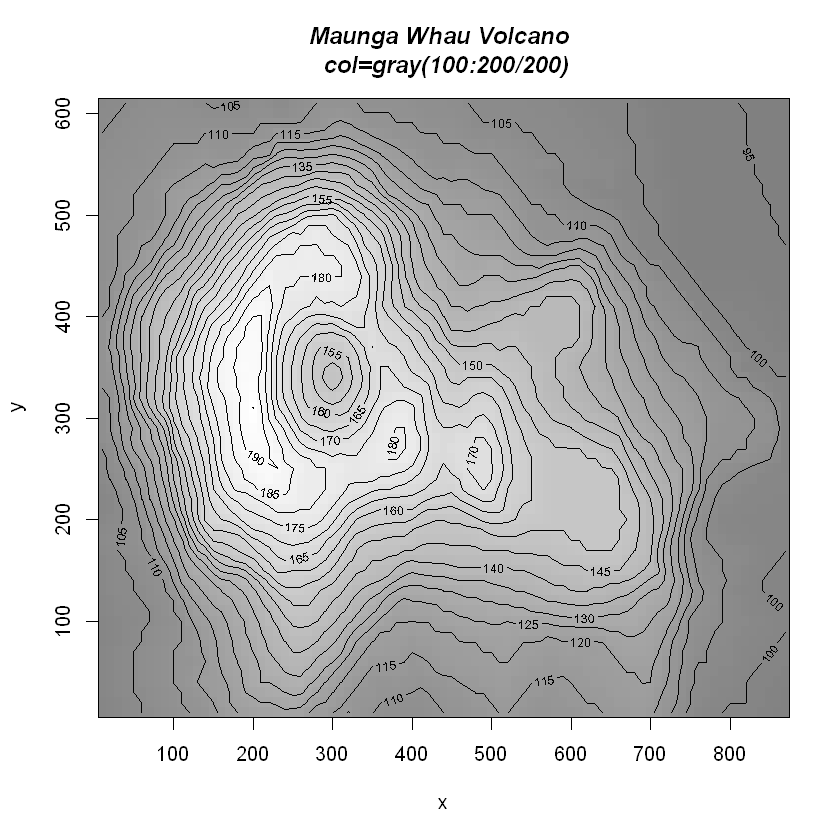


flld.c> x <- 10*1:nrow(volcano)

flld.c> y <- 10*1:ncol(volcano)

flld.c> filled.contour(x, y, volcano, color = terrain.colors,
flld.c+     plot.title = title(main = "The Topography of Maunga Whau",
flld.c+     xlab = "Meters North", ylab = "Meters West"),
flld.c+     plot.axes = { axis(1, seq(100, 800, by = 100))
flld.c+                   axis(2, seq(100, 600, by = 100)) },
flld.c+     key.title = title(main = "Height\n(meters)"),
flld.c+     key.axes = axis(4, seq(90, 190, by = 10)))  # maybe also asp = 1


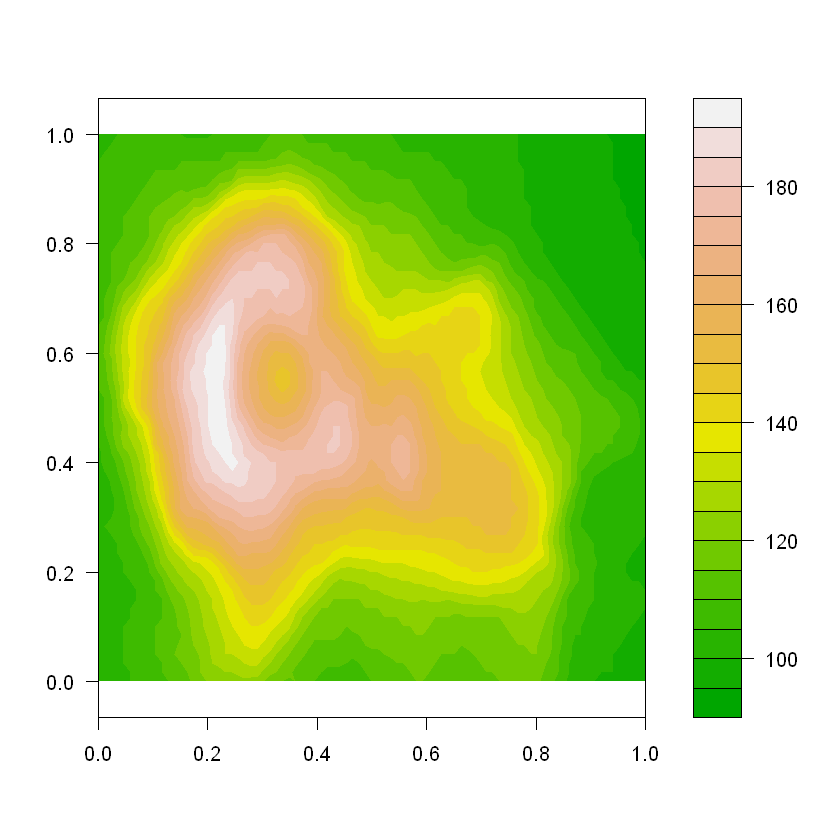


flld.c> mtext(paste("filled.contour(.) from", R.version.string),
flld.c+       side = 1, line = 4, adj = 1, cex = .66)

flld.c> # Annotating a filled contour plot
flld.c> a <- expand.grid(1:20, 1:20)

flld.c> b <- matrix(a[,1] + a[,2], 20)

flld.c> filled.contour(x = 1:20, y = 1:20, z = b,
flld.c+                plot.axes = { axis(1); axis(2); points(10, 10) })


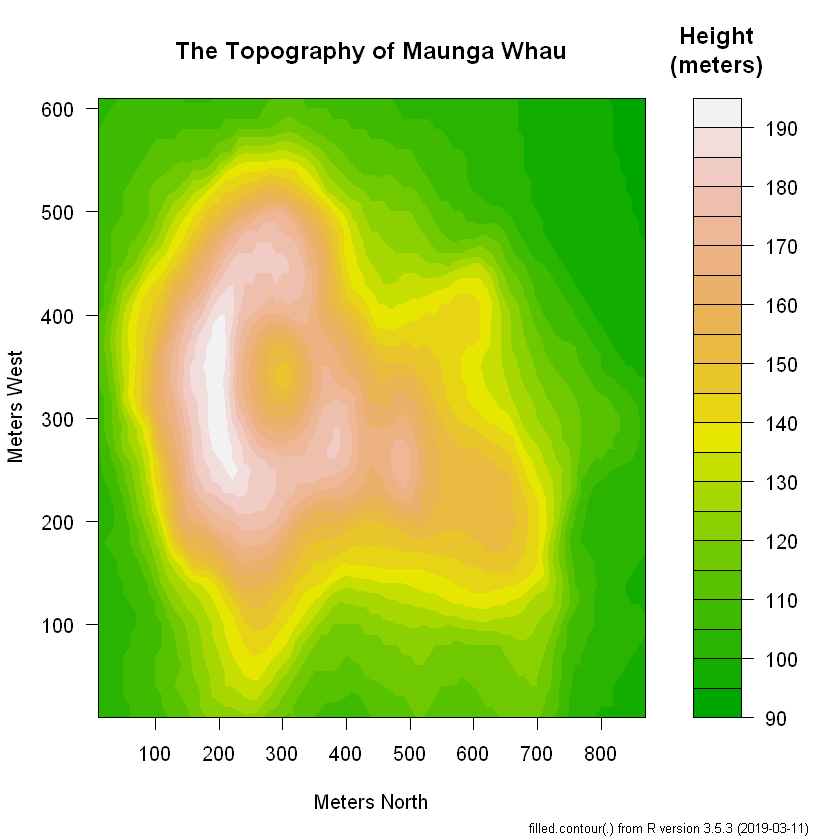


flld.c> ## Persian Rug Art:
flld.c> x <- y <- seq(-4*pi, 4*pi, len = 27)

flld.c> r <- sqrt(outer(x^2, y^2, "+"))

flld.c> filled.contour(cos(r^2)*exp(-r/(2*pi)), axes = FALSE)


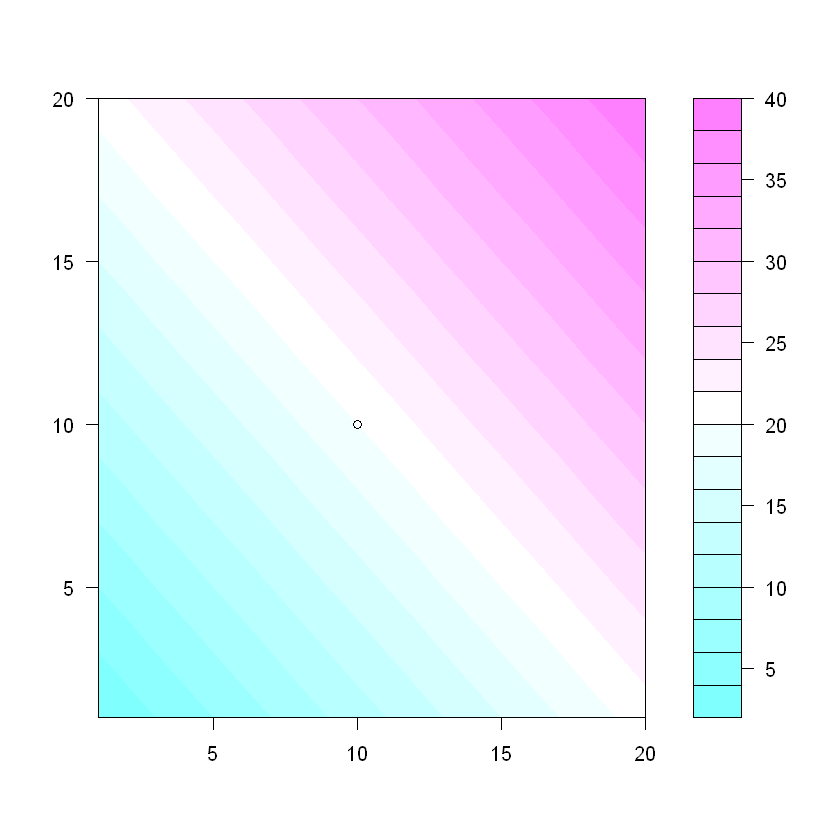


flld.c> ## rather, the key *should* be labeled:
flld.c> filled.contour(cos(r^2)*exp(-r/(2*pi)), frame.plot = FALSE,
flld.c+                plot.axes = {})


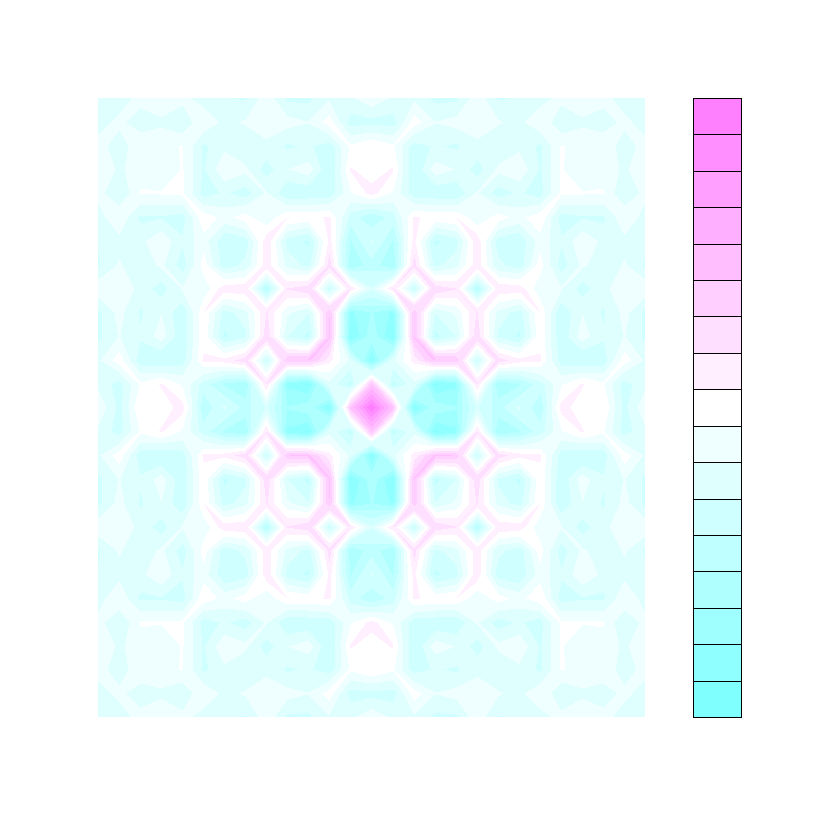

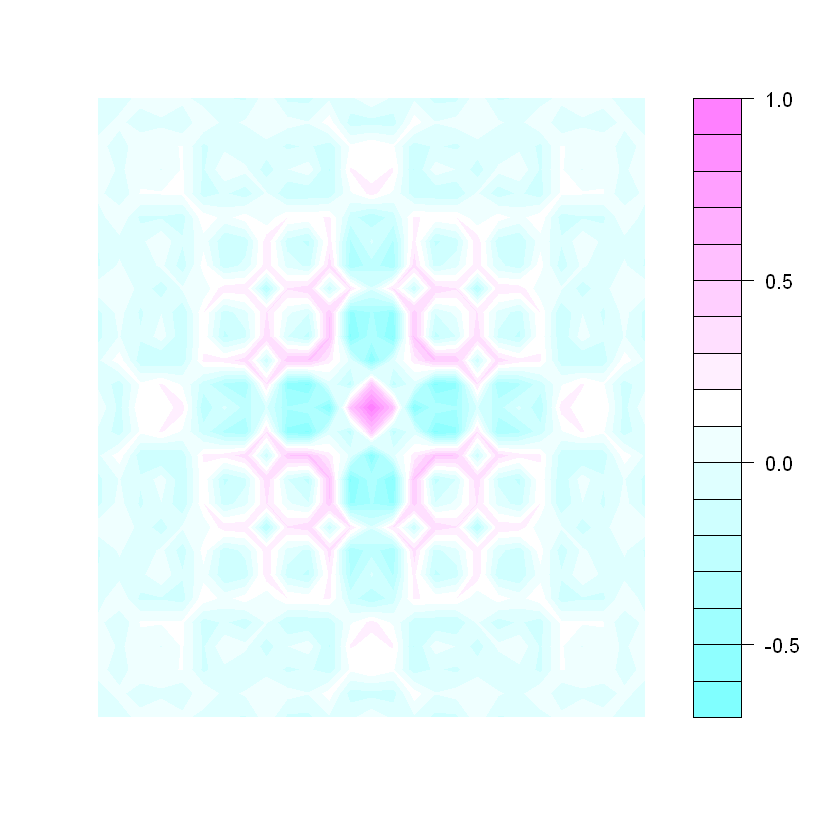

In [32]:
demo(image)



	demo(persp)
	---- ~~~~~

> ### Demos for  persp()  plots   -- things not in  example(persp)
> ### -------------------------
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## (1) The Obligatory Mathematical surface.
> ##     Rotated sinc function.
> 
> x <- seq(-10, 10, length.out = 50)

> y <- x

> rotsinc <- function(x,y)
+ {
+     sinc <- function(x) { y <- sin(x)/x ; y[is.na(y)] <- 1; y }
+     10 * sinc( sqrt(x^2+y^2) )
+ }

> sinc.exp <- expression(z == Sinc(sqrt(x^2 + y^2)))

> z <- outer(x, y, rotsinc)

> oldpar <- par(bg = "white")

> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue")

> title(sub=".")## work around persp+plotmath bug

> title(main = sinc.exp)

> persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "lightblue",
+       ltheta = 120, shade = 0.75, ticktype = "detailed",
+       xlab = "X", ylab = "Y", zlab = "Z")


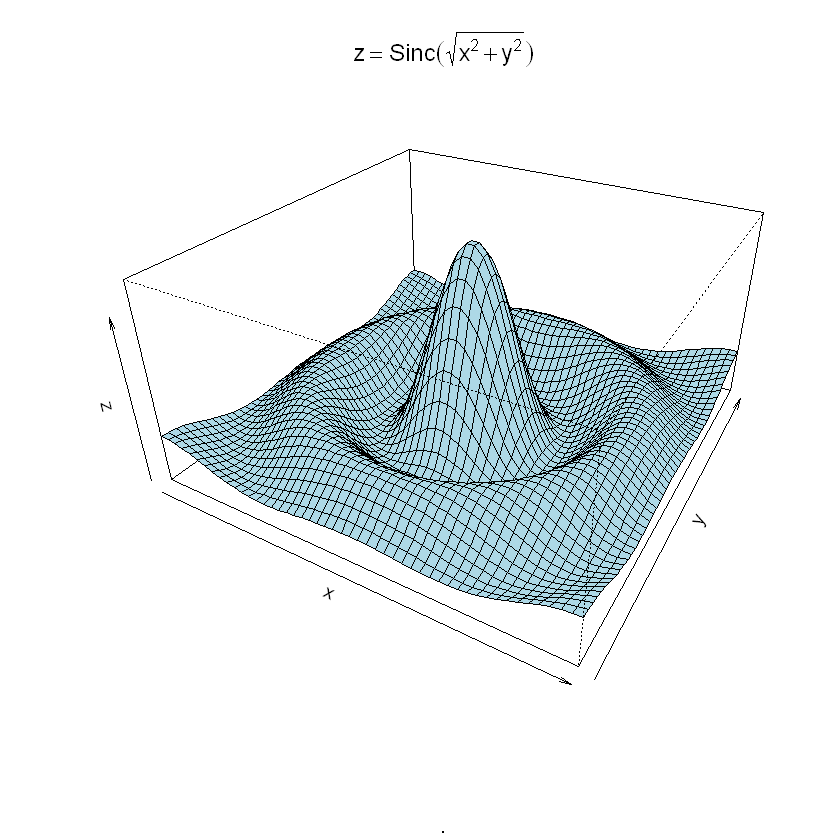


> title(sub=".")## work around persp+plotmath bug

> title(main = sinc.exp)

> ## (2) Visualizing a simple DEM model
> 
> z <- 2 * volcano        # Exaggerate the relief

> x <- 10 * (1:nrow(z))   # 10 meter spacing (S to N)

> y <- 10 * (1:ncol(z))   # 10 meter spacing (E to W)

> persp(x, y, z, theta = 120, phi = 15, scale = FALSE, axes = FALSE)


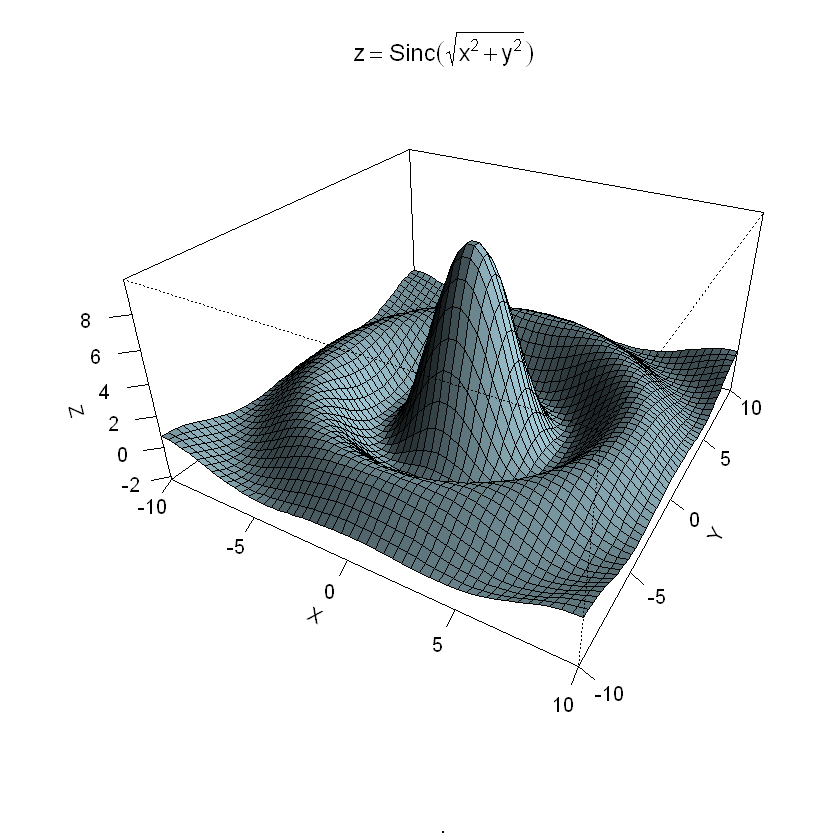


> ## (3) Now something more complex
> ##     We border the surface, to make it more "slice like"
> ##     and color the top and sides of the surface differently.
> 
> z0 <- min(z) - 20

> z <- rbind(z0, cbind(z0, z, z0), z0)

> x <- c(min(x) - 1e-10, x, max(x) + 1e-10)

> y <- c(min(y) - 1e-10, y, max(y) + 1e-10)

> fill <- matrix("green3", nrow = nrow(z)-1, ncol = ncol(z)-1)

> fill[ , i2 <- c(1,ncol(fill))] <- "gray"

> fill[i1 <- c(1,nrow(fill)) , ] <- "gray"

> par(bg = "lightblue")

> persp(x, y, z, theta = 120, phi = 15, col = fill, scale = FALSE, axes = FALSE)


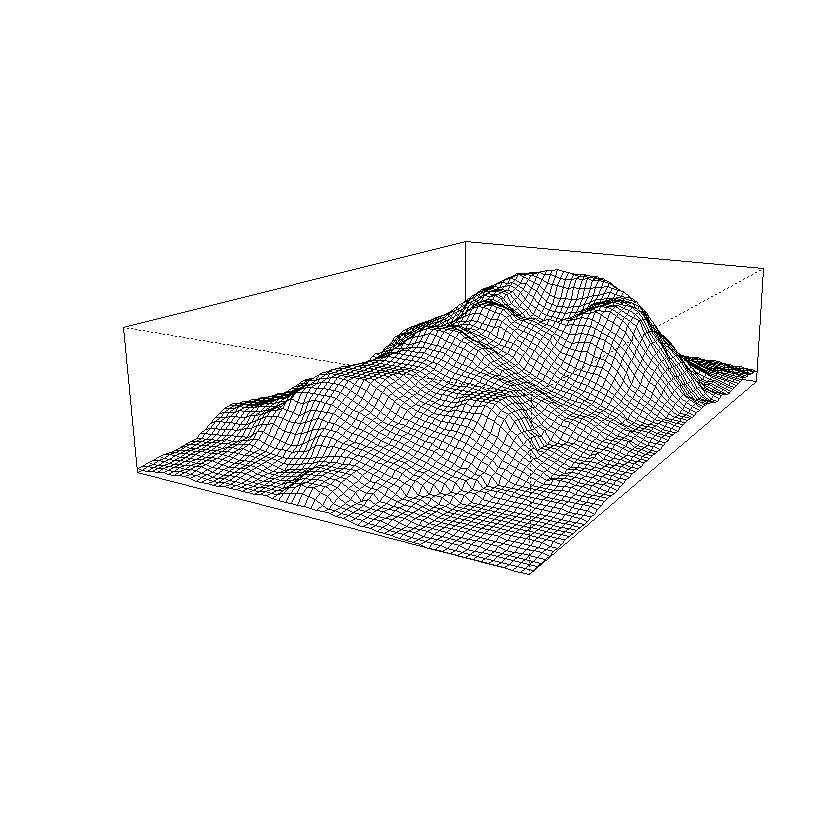


> title(main = "Maunga Whau\nOne of 50 Volcanoes in the Auckland Region.",
+       font.main = 4)

> par(bg = "slategray")

> persp(x, y, z, theta = 135, phi = 30, col = fill, scale = FALSE,
+       ltheta = -120, lphi = 15, shade = 0.65, axes = FALSE)


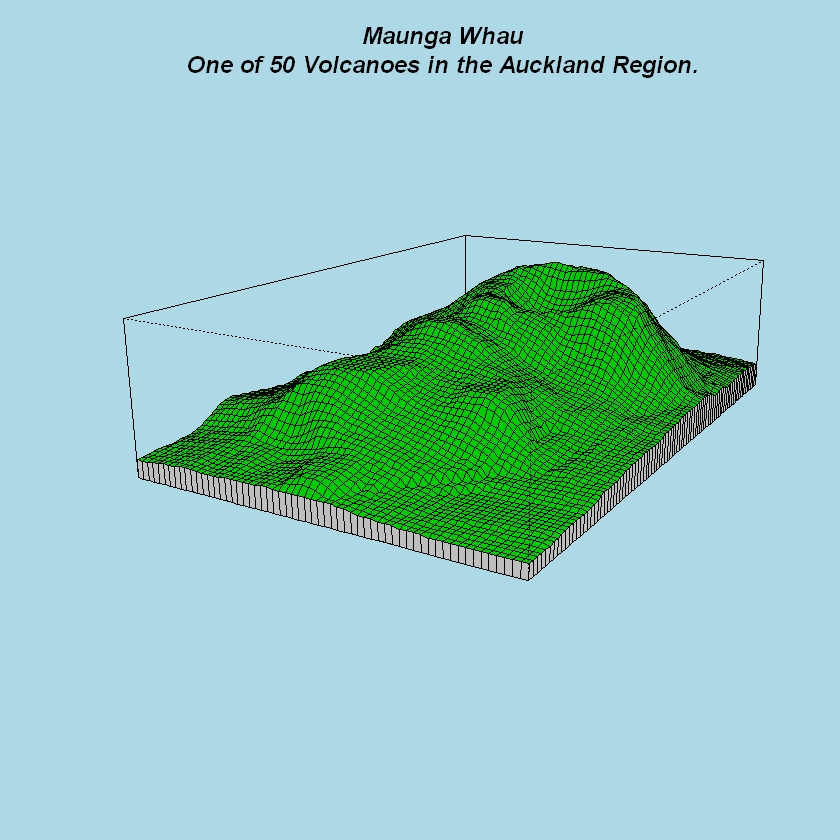


> ## Don't draw the grid lines :  border = NA
> persp(x, y, z, theta = 135, phi = 30, col = "green3", scale = FALSE,
+       ltheta = -120, shade = 0.75, border = NA, box = FALSE)


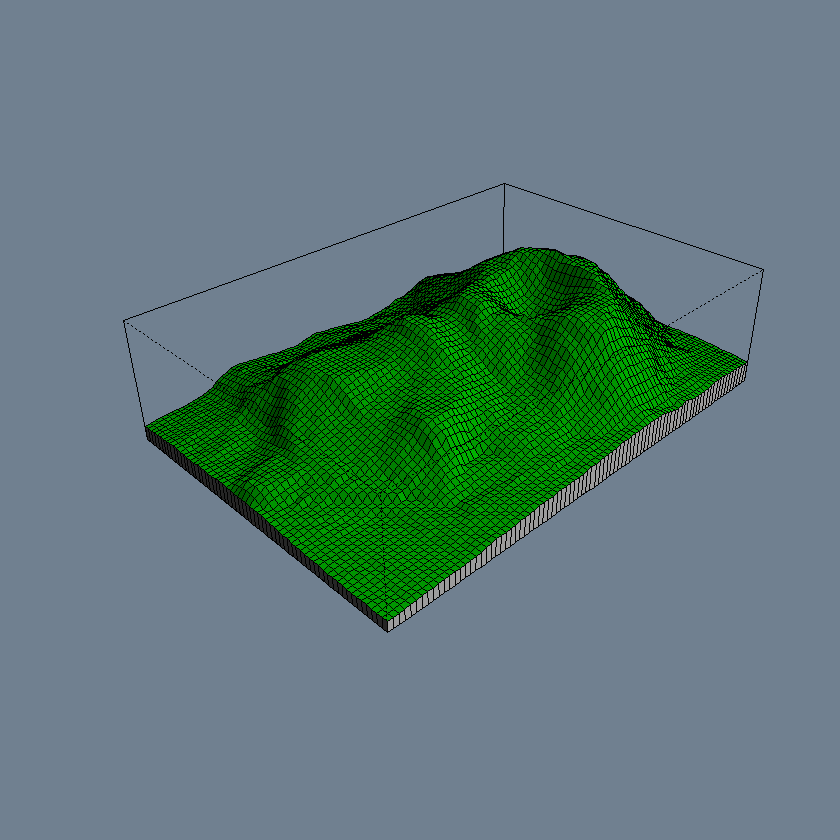


> ## `color gradient in the soil' :
> fcol <- fill ; fcol[] <- terrain.colors(nrow(fcol))

> persp(x, y, z, theta = 135, phi = 30, col = fcol, scale = FALSE,
+       ltheta = -120, shade = 0.3, border = NA, box = FALSE)


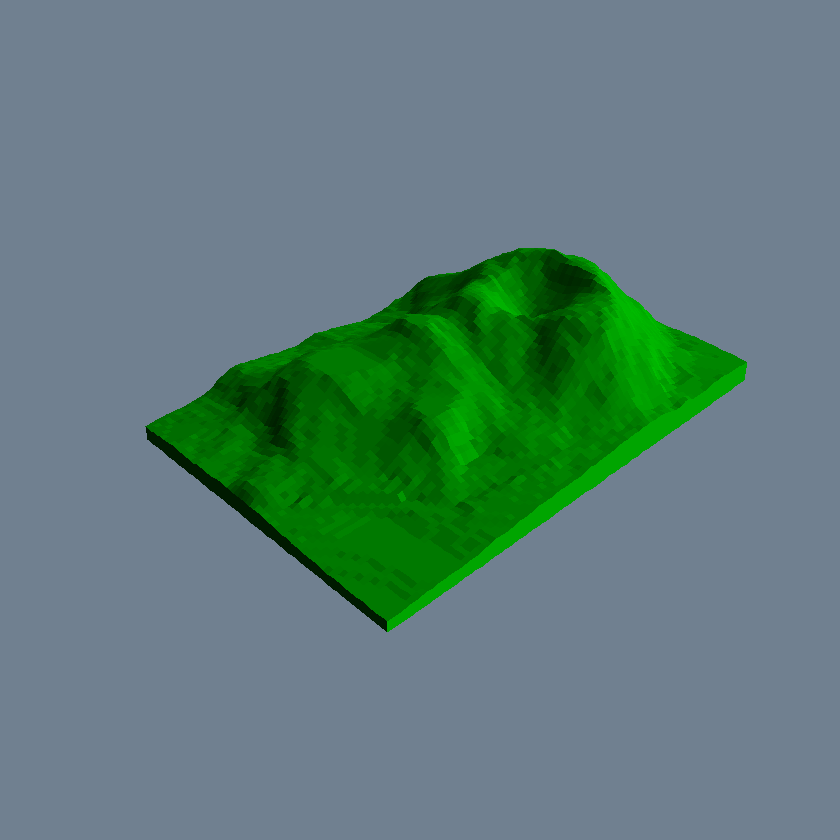


> ## `image like' colors on top :
> fcol <- fill

> zi <- volcano[ -1,-1] + volcano[ -1,-61] +
+            volcano[-87,-1] + volcano[-87,-61]  ## / 4

> fcol[-i1,-i2] <-
+     terrain.colors(20)[cut(zi,
+                            stats::quantile(zi, seq(0,1, length.out = 21)),
+                            include.lowest = TRUE)]

> persp(x, y, 2*z, theta = 110, phi = 40, col = fcol, scale = FALSE,
+       ltheta = -120, shade = 0.4, border = NA, box = FALSE)


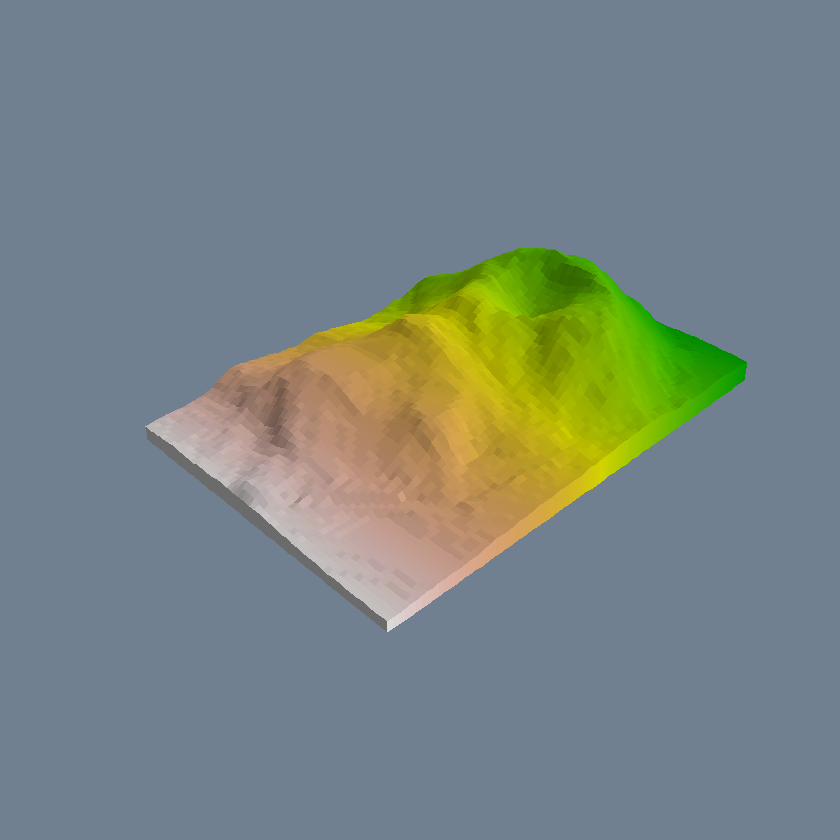


> ## reset par():
> par(oldpar)


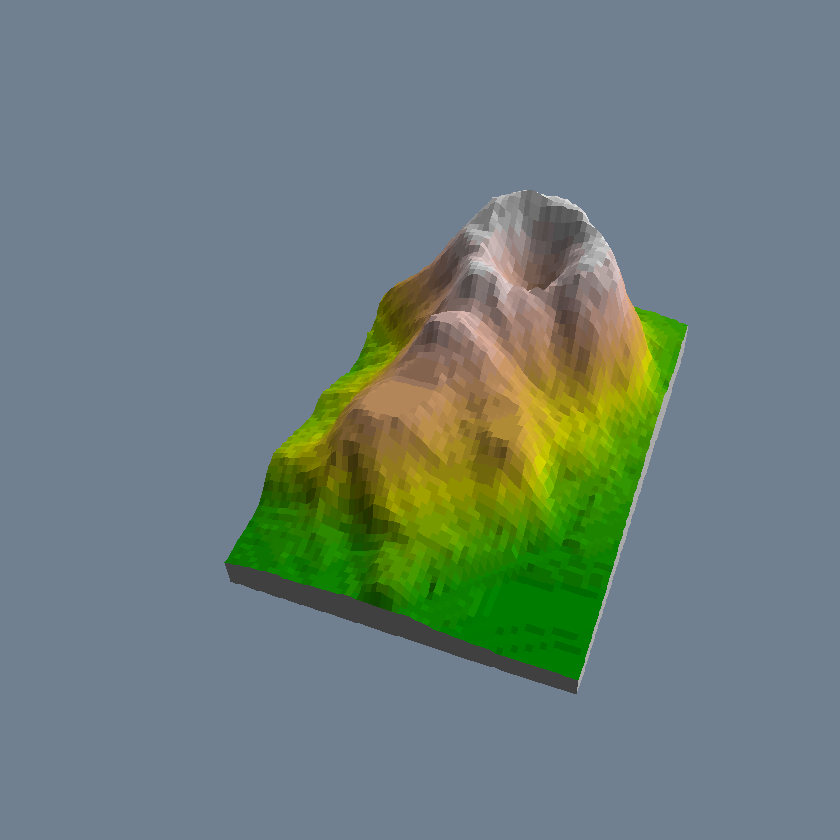

In [33]:
demo(persp)

但我们最关心的是分析变量之间的关系，考虑如何用图形展示出这种关系并分析，我们先利用绘图进行简单的分析：

- 定量变量的分析：直方图`hist()`描述变量的基本特征，散点图`plot()`描述两变量的关系
- 定性变量的分析：频数表`table()`分析单因素、双因素、三因素

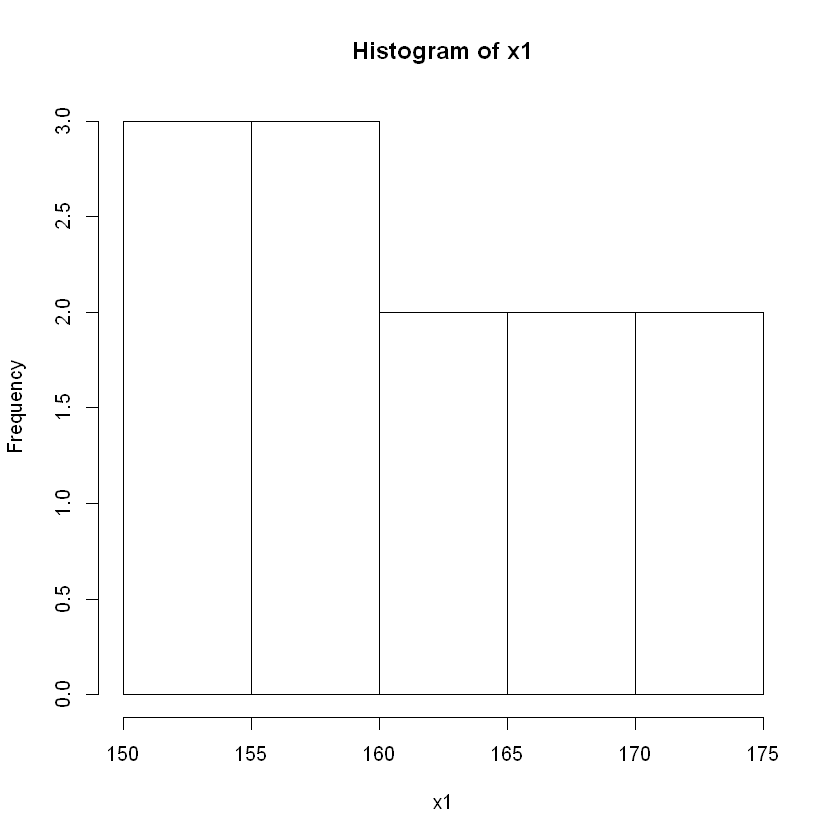

In [36]:
# 定量变量的分析，身高和体重

x1=c(171,175,159,155,152,158,154,164,168,166,159,164)
x2=c(57,64,41,38,35,44,41,51,57,49,47,46)

hist(x1) #做出身高的直方图

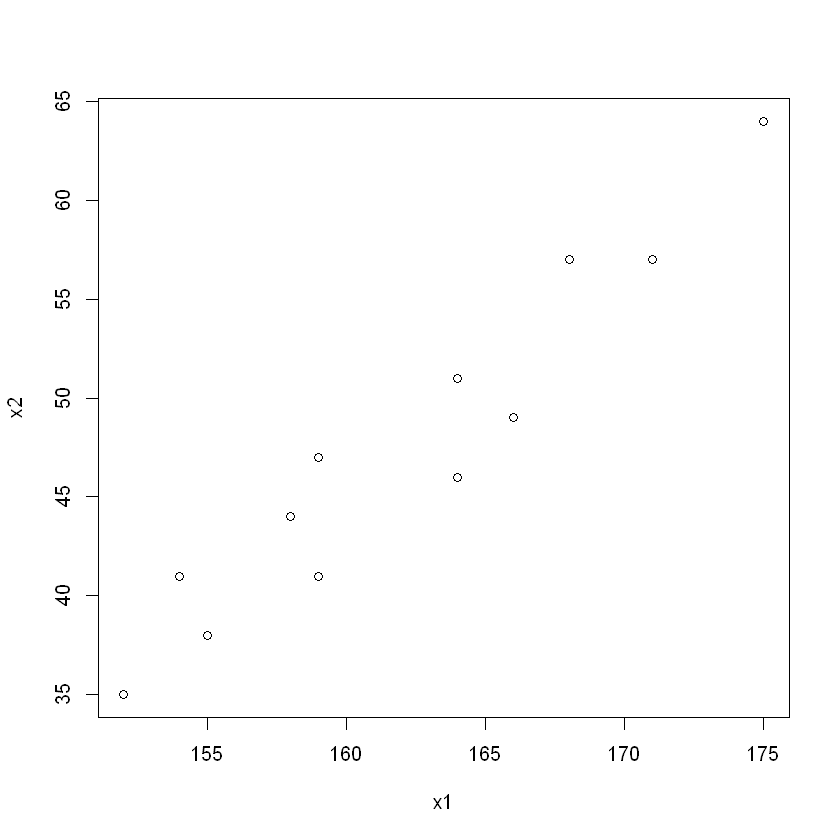

In [37]:
plot(x1,x2) #做出身高和体重的散点图

In [39]:
# 定性变量的分析

# 单因素

data=read.table("clipboard",header=T) #将剪切板数据读入数据框data中
head(data)#显示前6组数据


年龄,性别,风险,专兼职,职业,教育,结果
20-29,男,有,兼职,金融,高中,赚钱
50-59,女,有,兼职,科教,中学,持平
40-49,女,无,专职,科教,中学,赔钱
30-39,男,有,兼职,工人,中专,赚钱
50-59,女,有,专职,农民,大专,赚钱
40-49,女,有,兼职,管理,小学,赚钱


In [40]:
attach(data)#绑定数据
table(年龄)#一维列联表

年龄
    *  0-19 20-29 30-39 40-49 50-59   60- 
   20     3    92   167   157    51    24 

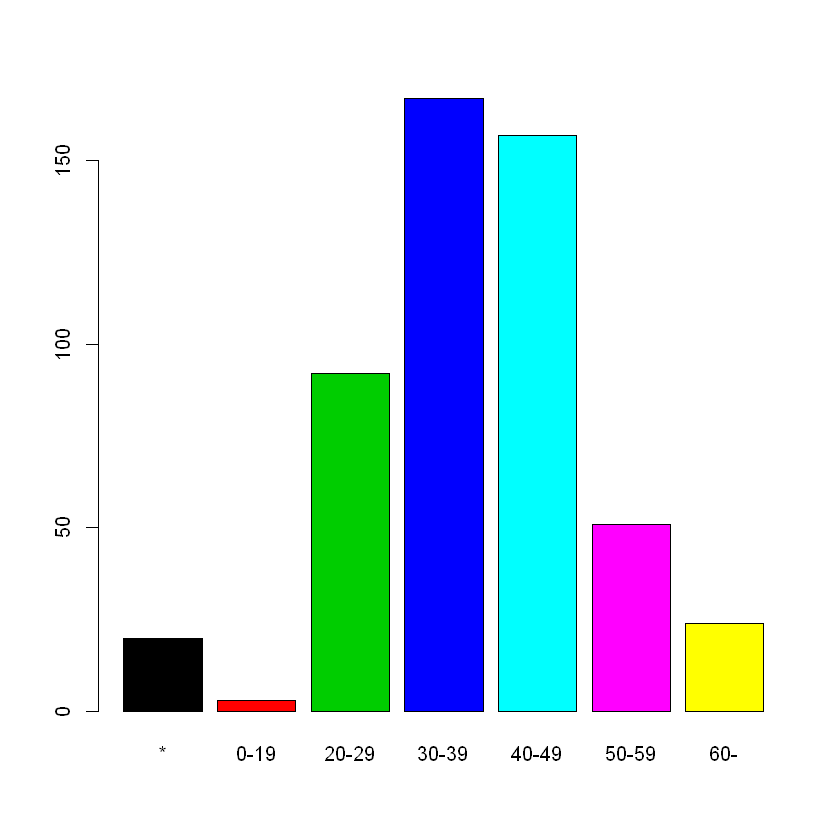

In [41]:
# ?barplot
barplot(table(年龄),col=1:7)#条形图

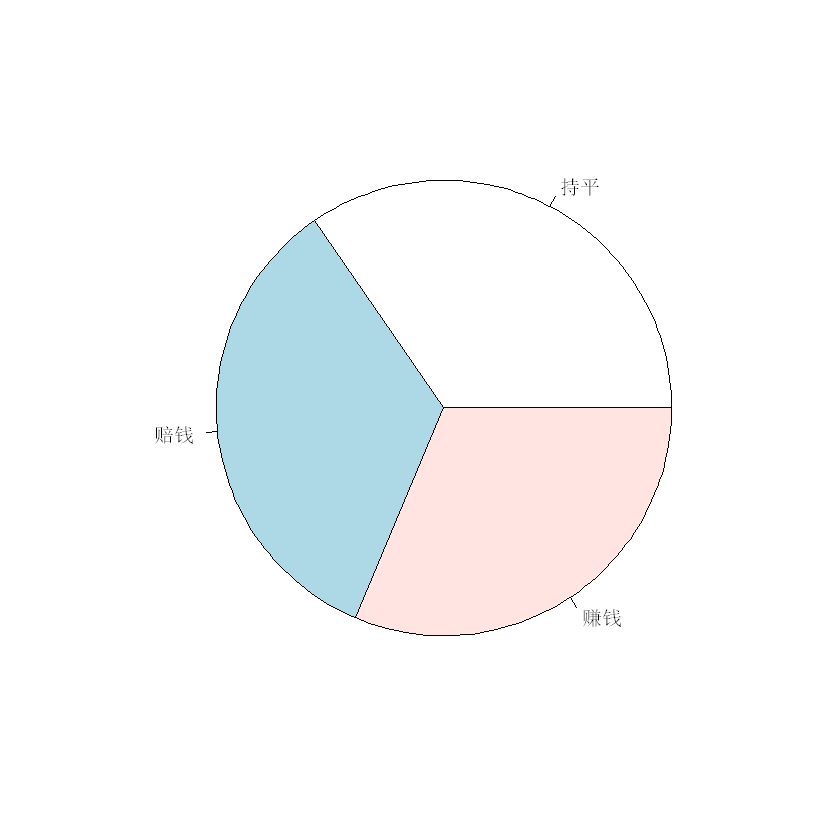

In [42]:
pie(table(结果))#饼图

In [43]:
table(年龄,性别) #二维列联表

       性别
年龄     男  女
  *       9  11
  0-19    2   1
  20-29  69  23
  30-39 101  66
  40-49  89  68
  50-59  24  27
  60-    15   9

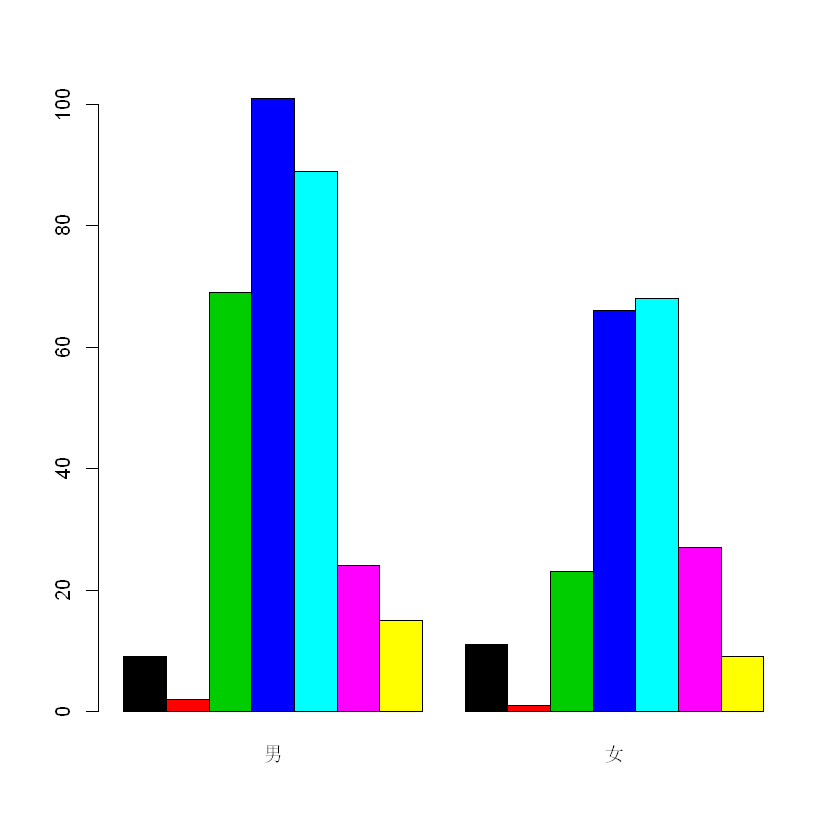

In [44]:
barplot(table(年龄,性别),beside=T,col=1:7)#以性别分组的年龄条图

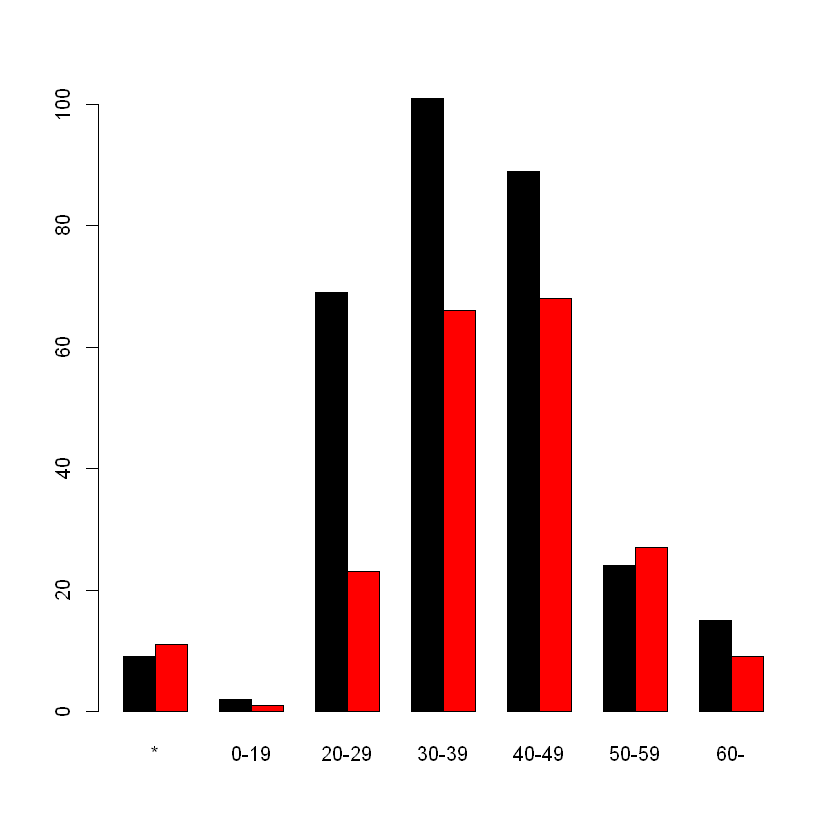

In [45]:
barplot(table(性别,年龄),beside=T,col=1:2)#以年龄分组的性别条图

In [46]:
ftable(年龄,性别,结果) #以年龄、性别排列的结果频数三维列联表

           结果 持平 赔钱 赚钱
年龄  性别                    
*     男           4    3    2
      女           3    7    1
0-19  男           0    0    2
      女           1    0    0
20-29 男          21   17   31
      女          10    7    6
30-39 男          31   30   40
      女          30   20   16
40-49 男          31   30   28
      女          25   30   13
50-59 男           5   11    8
      女           8   10    9
60-   男           7    5    3
      女           2    5    2

In [47]:
ftable(性别,年龄,结果)#以性别、年龄排列的结果频数三维列联表

           结果 持平 赔钱 赚钱
性别 年龄                     
男   *             4    3    2
     0-19          0    0    2
     20-29        21   17   31
     30-39        31   30   40
     40-49        31   30   28
     50-59         5   11    8
     60-           7    5    3
女   *             3    7    1
     0-19          1    0    0
     20-29        10    7    6
     30-39        30   20   16
     40-49        25   30   13
     50-59         8   10    9
     60-           2    5    2

In [52]:
# ?ftable
(ft=ftable(性别,结果,年龄))#显示以性别、结果排列的年龄频数三维列联表
class(ft)

          年龄  * 0-19 20-29 30-39 40-49 50-59 60-
性别 结果                                         
男   持平       4    0    21    31    31     5   7
     赔钱       3    0    17    30    30    11   5
     赚钱       2    2    31    40    28     8   3
女   持平       3    1    10    30    25     8   2
     赔钱       7    0     7    20    30    10   5
     赚钱       1    0     6    16    13     9   2

[1] "ftable"

In [53]:
rowSums(ft)#求行和
colSums(ft)#求列和
sum(ft)#求总和
detach()

[1]  99  96 114  79  79  47

[1]  20   3  92 167 157  51  24

[1] 514

前面的数据分析都是基于一维、二维的数据，容易作出直观图示，但多元的高维图示就很难绘制。人们想了不少办法，这些方法大体上分为两类：

- 使高维空间的点和平面上的某种图形相对应，这些图形能反映高维数据的某些特点或数据间的某些关系；
- 尽可能多地保留原始数据信息的原则下进行降维，若能使数据位数降至二维或一维，则可以在平面上作图。

后者可用聚类分析、主成份分析、因子分析、对应分析等方法解决，此处介绍前者的几种图示方法。

以城镇居民生活消费为例进行分析，介绍以下图形函数：

- 条图`barplot()`
- 箱尾图`baxplot()`
- 星象图`stars()`
- 脸谱图`faces()`
- 调和曲线图`plot.andrews()`

In [54]:
#将剪切板数据读入数据框d3.1中  
d3.1=read.table("clipboard",header=T);d3.1 
str(d3.1)

,食品,衣着,设备,医疗,交通,教育,居住,杂项
北京,4934.05,1512.88,981.13,1294.07,2328.51,2383.96,1246.19,649.66
天津,4249.31,1024.15,760.56,1163.98,1309.94,1639.83,1417.45,463.64
河北,2789.85,975.94,546.75,833.51,1010.51,895.06,917.19,266.16
山西,2600.37,1064.61,477.74,640.22,1027.99,1054.05,991.77,245.07
内蒙古,2824.89,1396.86,561.71,719.13,1123.82,1245.09,941.79,468.17
辽宁,3560.21,1017.65,439.28,879.08,1033.36,1052.94,1047.04,400.16
吉林,2842.68,1127.09,407.35,854.80,873.88,997.75,1062.46,394.29
黑龙江,2633.18,1021.45,355.67,729.55,746.03,938.21,784.51,310.67
上海,6125.45,1330.05,959.49,857.11,3153.72,2653.67,1412.10,763.80
江苏,3928.71,990.03,707.31,689.37,1303.02,1699.26,1020.09,377.37


'data.frame':	31 obs. of  8 variables:
 $ 食品: num  4934 4249 2790 2600 2825 ...
 $ 衣着: num  1513 1024 976 1065 1397 ...
 $ 设备: num  981 761 547 478 562 ...
 $ 医疗: num  1294 1164 834 640 719 ...
 $ 交通: num  2329 1310 1011 1028 1124 ...
 $ 教育: num  2384 1640 895 1054 1245 ...
 $ 居住: num  1246 1417 917 992 942 ...
 $ 杂项: num  650 464 266 245 468 ...


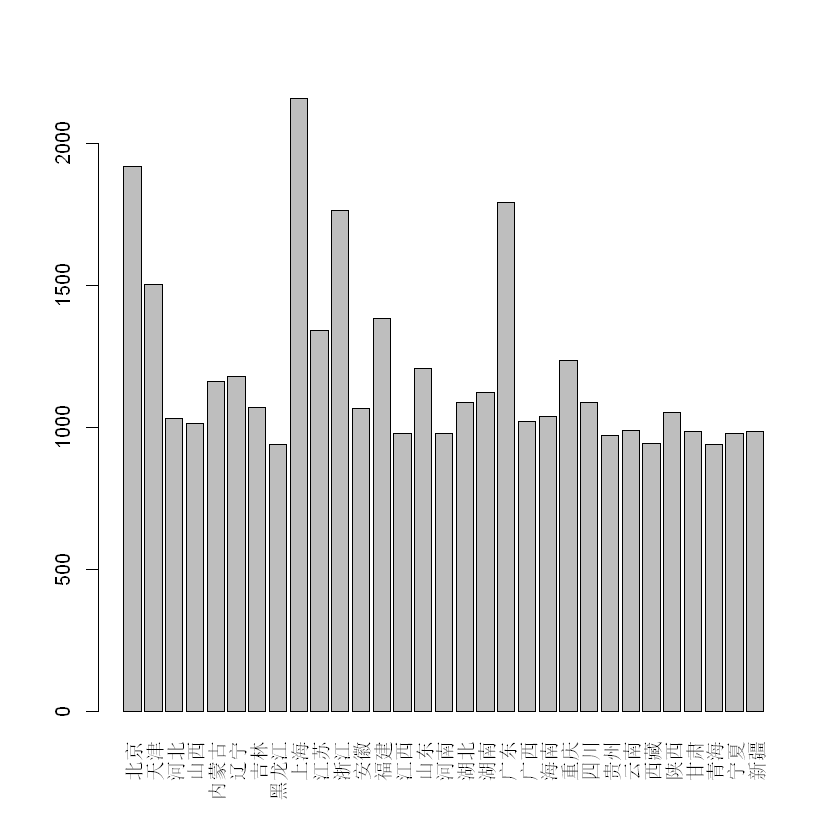

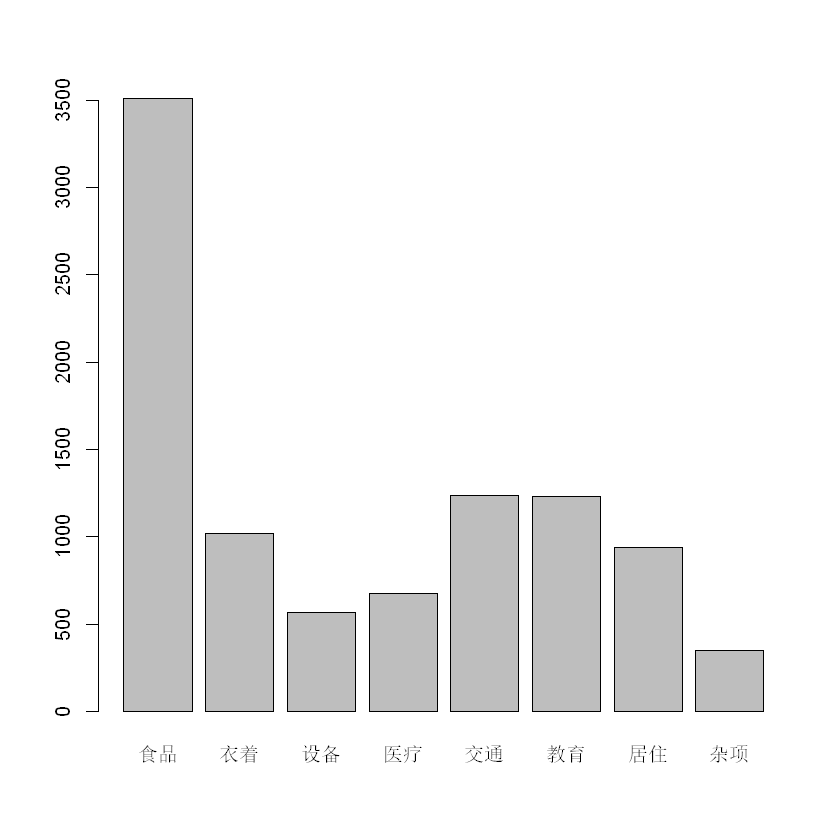

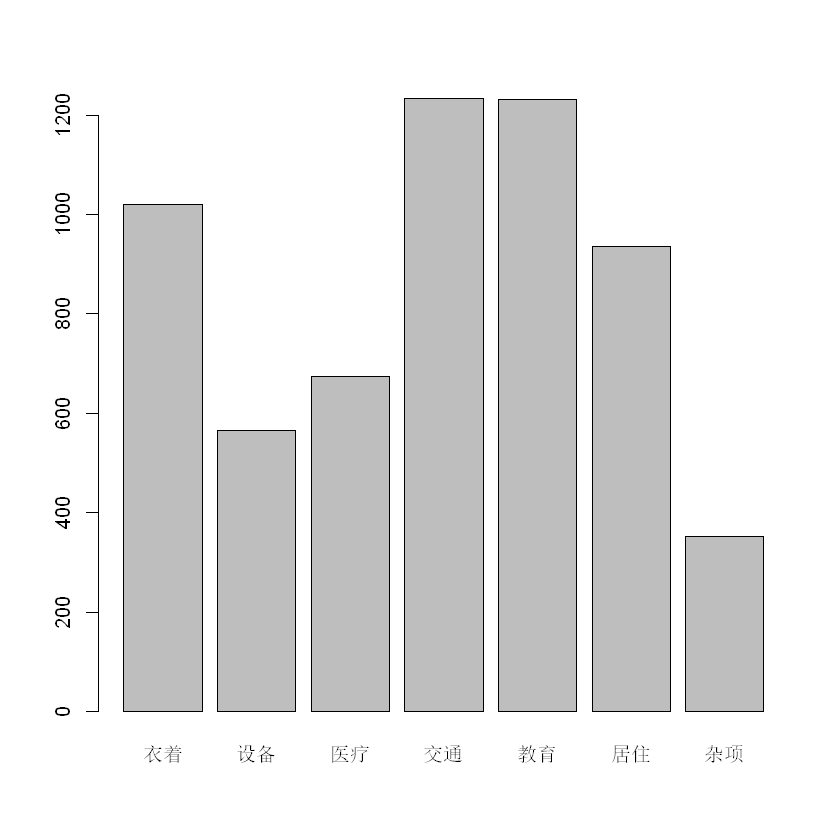

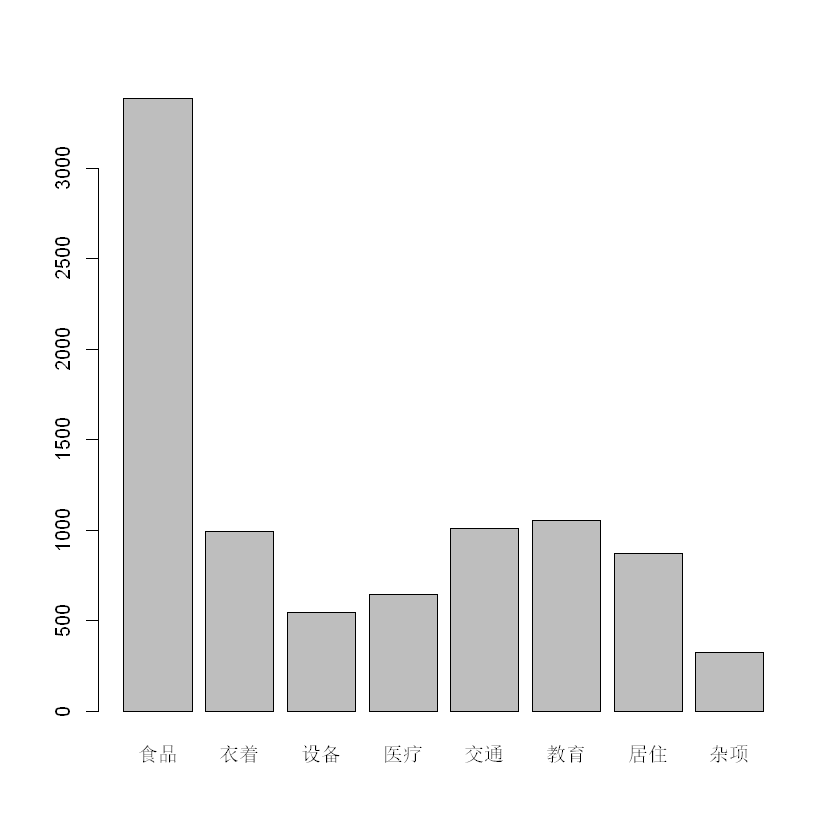

In [58]:
# 对数据直接作条图意义不大，通常需要对其统计量作直观分析（如均值、中位数等），加上apply函数选取特定数据

barplot(apply(d3.1,1,mean),las=3)#按行做均值条形图
barplot(apply(d3.1,2,mean))#按列做均值图条形图
barplot(apply(d3.1[,2:8],2,mean))#去掉第一列后的数据按列做均值条形图
barplot(apply(d3.1,2,median))#按列做中位数条形图

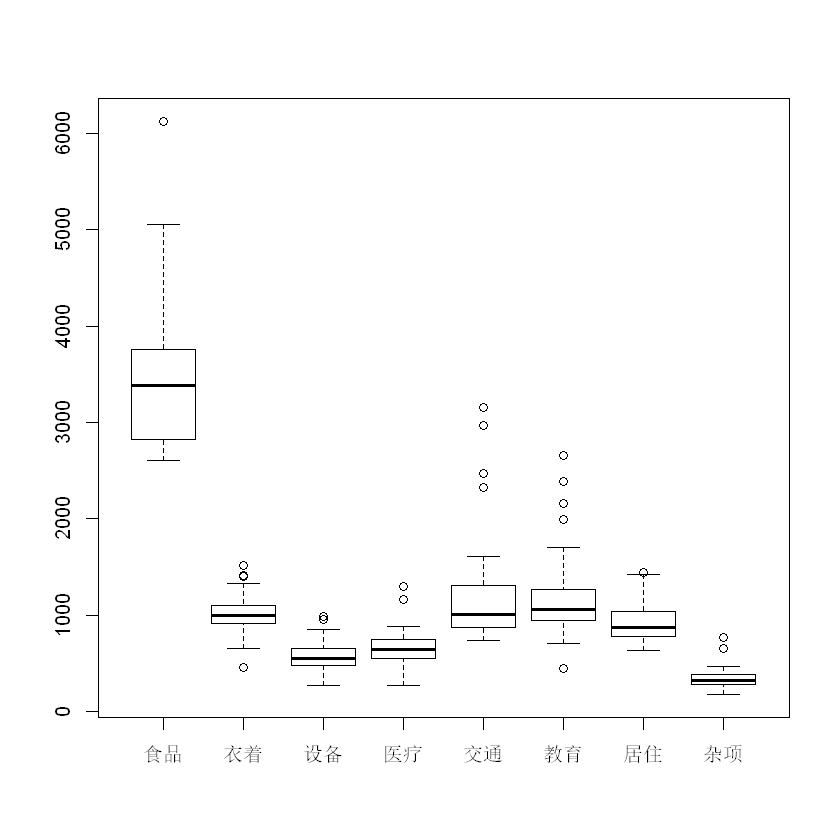

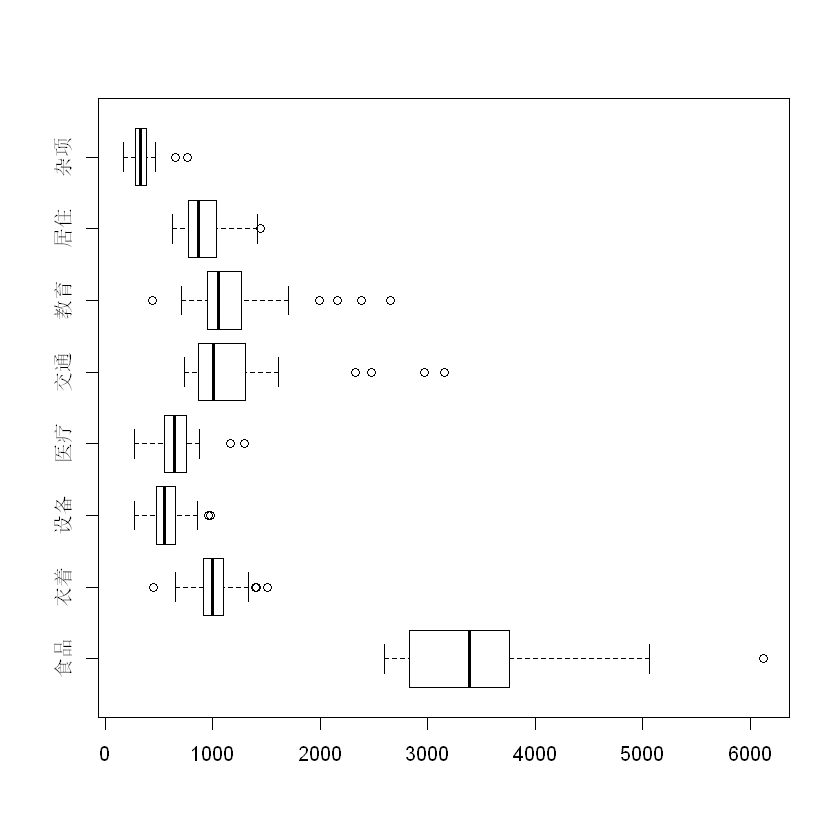

In [62]:
# 箱尾图可以比较清晰地表示数据的分布特征，由四部分组成：（1）上下横线为样本25%和75%分位数（2）中间横线为中位数（3）向上或向下延伸的直线为“尾线”，一般是最大最小值（4）顶部圆圈为异常值

boxplot(d3.1)#按列做箱线图
boxplot(d3.1,horizontal=T)#箱线图中图形按水平放置

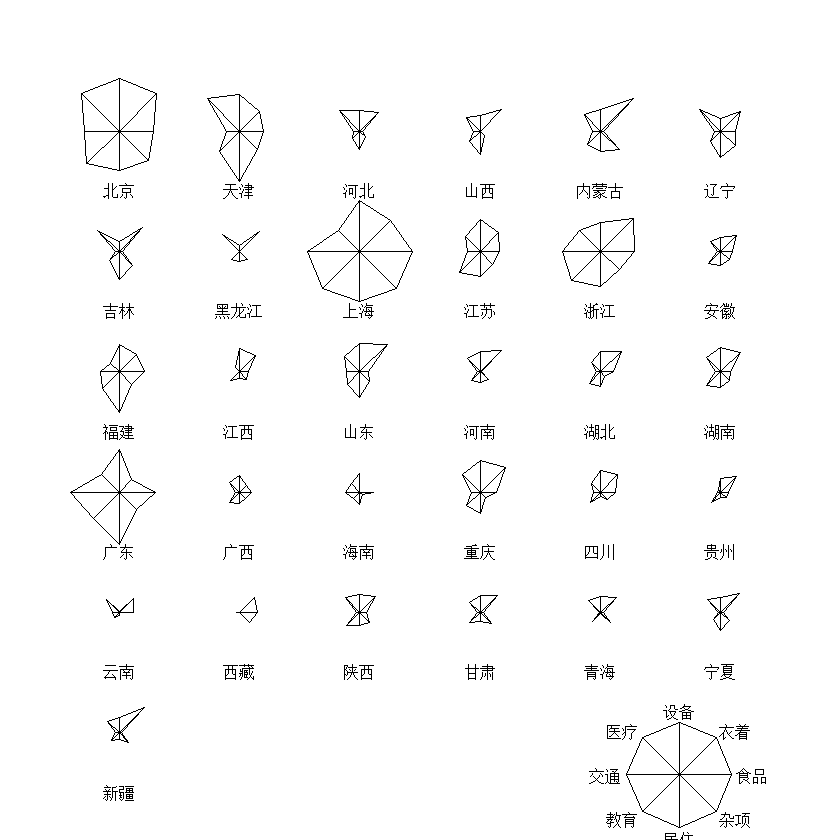

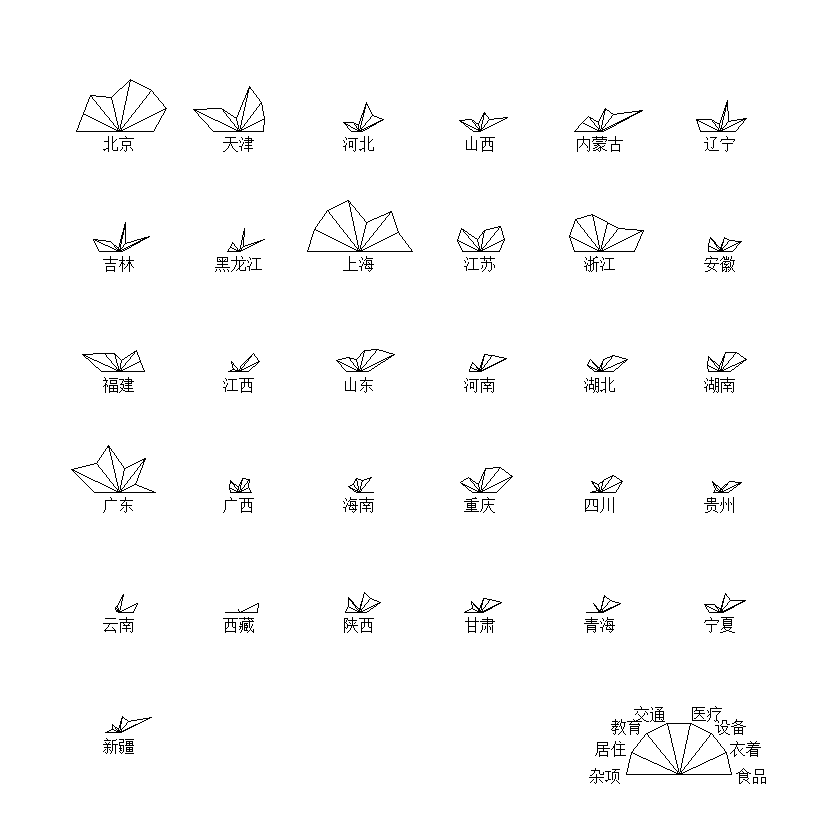

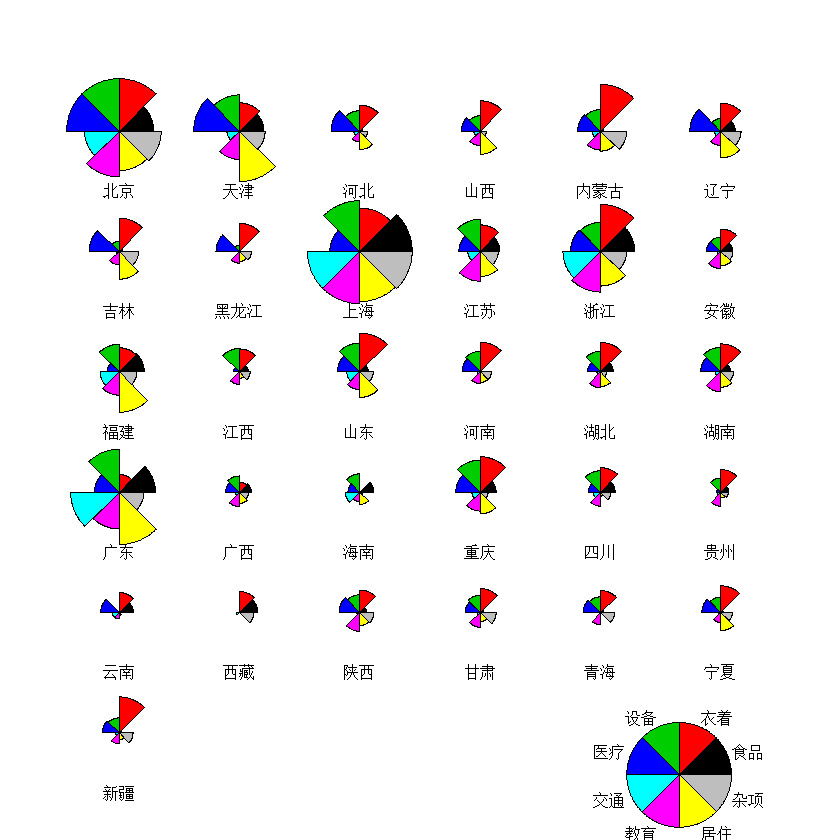

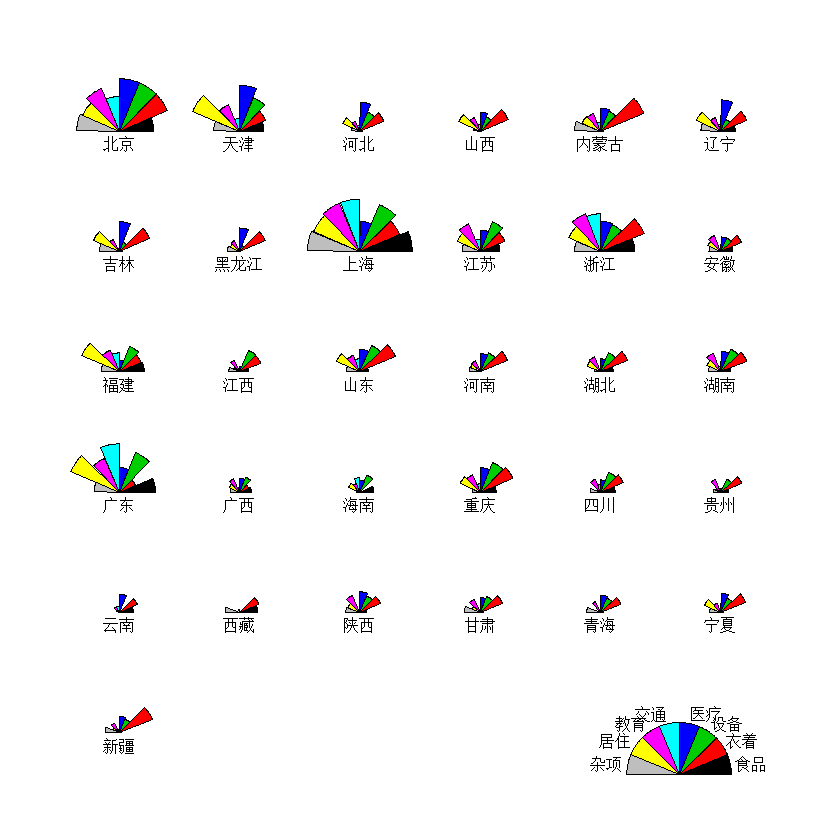

In [65]:
# 星相图是雷达图的多元表示形式，将每个变量的各个观察单位的数值表示为一个图形
?stars
stars(d3.1,full=T,key.loc=c(13,1.5))                #具有图例的360度星相图
stars(d3.1,full=F,key.loc=c(13,1.5))                #具有图例的180度星相图
stars(d3.1,full=T,draw.segments=T,key.loc=c(13,1.5))#具有图例的360度彩色圆形星相图
stars(d3.1,full=F,draw.segments=T,key.loc=c(13,1.5))#具有图例的180度彩色圆形星相图

Warning message:
"package 'aplpack' is in use and will not be installed"

effect of variables:
 modified item       Var   
 "height of face   " "食品"
 "width of face    " "衣着"
 "structure of face" "设备"
 "height of mouth  " "医疗"
 "width of mouth   " "交通"
 "smiling          " "教育"
 "height of eyes   " "居住"
 "width of eyes    " "杂项"
 "height of hair   " "食品"
 "width of hair   "  "衣着"
 "style of hair   "  "设备"
 "height of nose  "  "医疗"
 "width of nose   "  "交通"
 "width of ear    "  "教育"
 "height of ear   "  "居住"


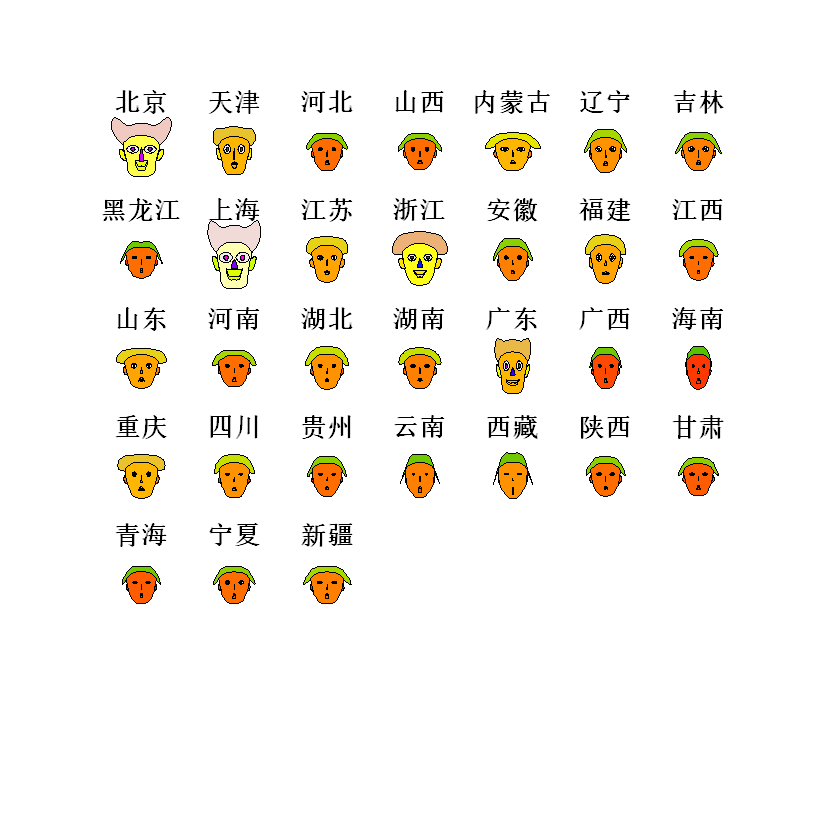

effect of variables:
 modified item       Var   
 "height of face   " "衣着"
 "width of face    " "设备"
 "structure of face" "医疗"
 "height of mouth  " "交通"
 "width of mouth   " "教育"
 "smiling          " "居住"
 "height of eyes   " "杂项"
 "width of eyes    " "衣着"
 "height of hair   " "设备"
 "width of hair   "  "医疗"
 "style of hair   "  "交通"
 "height of nose  "  "教育"
 "width of nose   "  "居住"
 "width of ear    "  "杂项"
 "height of ear   "  "衣着"


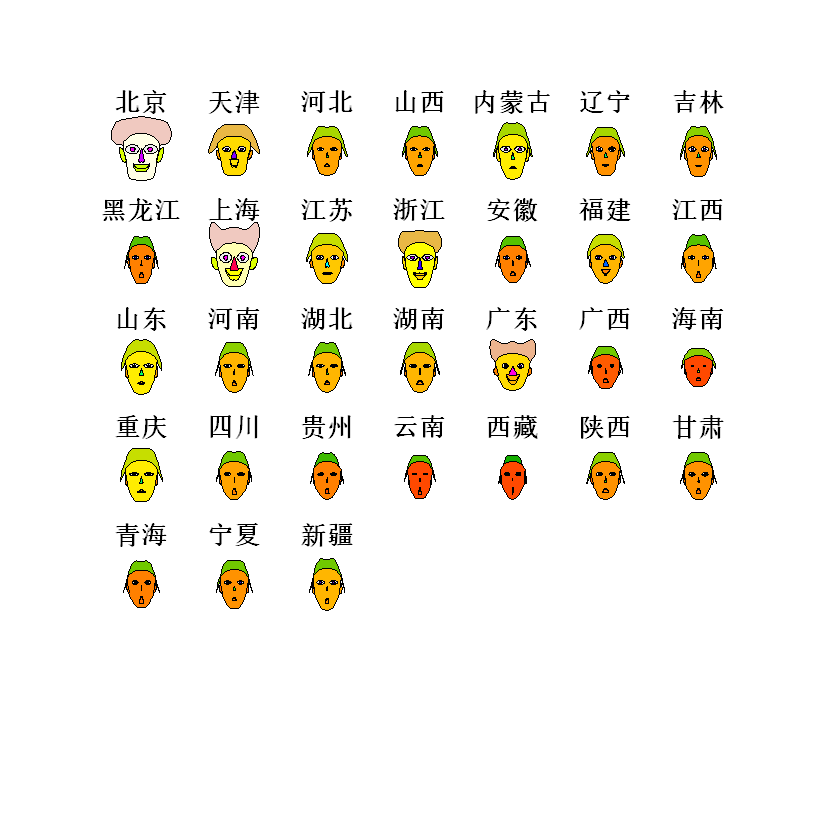

effect of variables:
 modified item       Var   
 "height of face   " "食品"
 "width of face    " "衣着"
 "structure of face" "设备"
 "height of mouth  " "医疗"
 "width of mouth   " "交通"
 "smiling          " "教育"
 "height of eyes   " "居住"
 "width of eyes    " "杂项"
 "height of hair   " "食品"
 "width of hair   "  "衣着"
 "style of hair   "  "设备"
 "height of nose  "  "医疗"
 "width of nose   "  "交通"
 "width of ear    "  "教育"
 "height of ear   "  "居住"


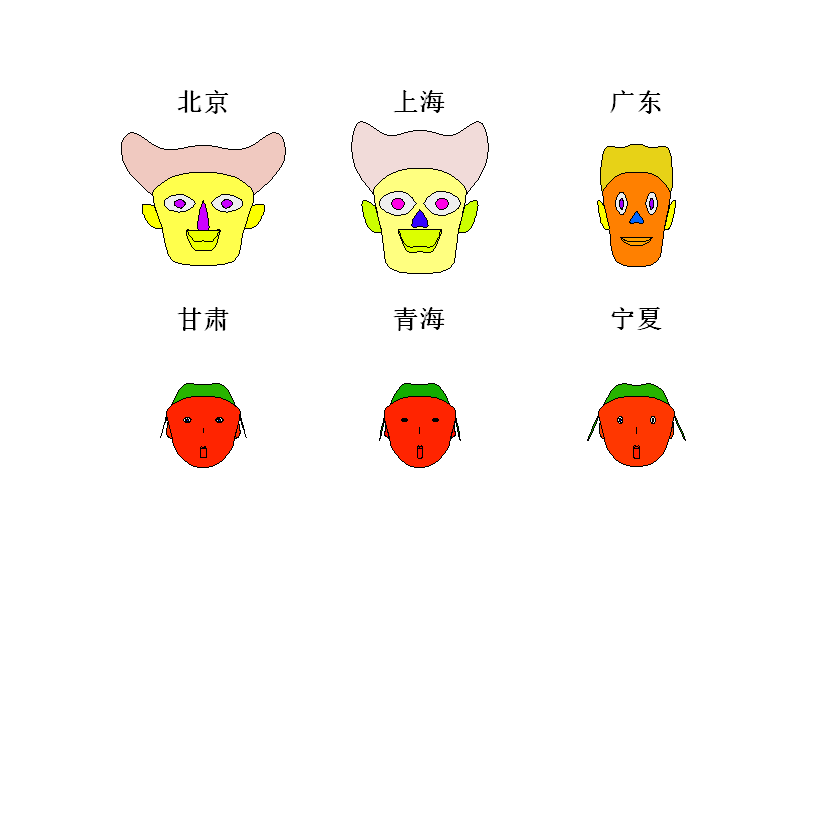

In [69]:
# 脸谱图是指将每个指标用人的脸的某个部位的形状或大小来表达，这些脸谱之间的差异反映所对应的样品之间的差异特征。
install.packages("aplpack")
library(aplpack)#加载aplpack包

?faces
faces(d3.1,ncol.plot=7)#按每行7个做脸谱图
faces(d3.1[,2:8],ncol.plot=7)#去掉第一个变量按每行7个做脸谱图
faces(d3.1[c(1,9,19,28,29,30),])#选择第1,9,19,28,29,30个观测的多元数据做脸谱图

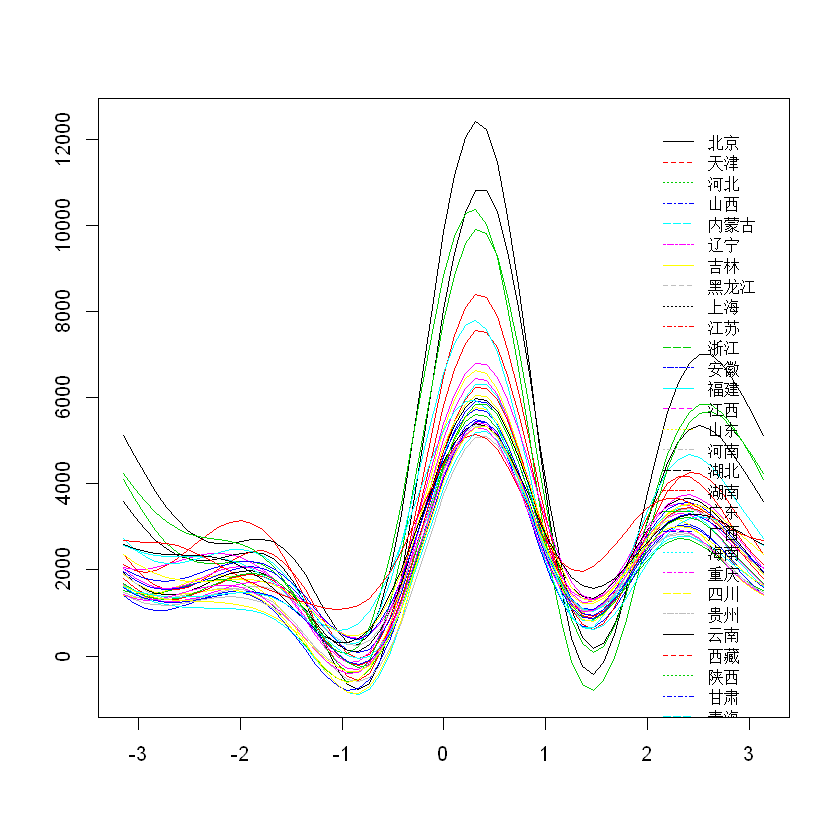

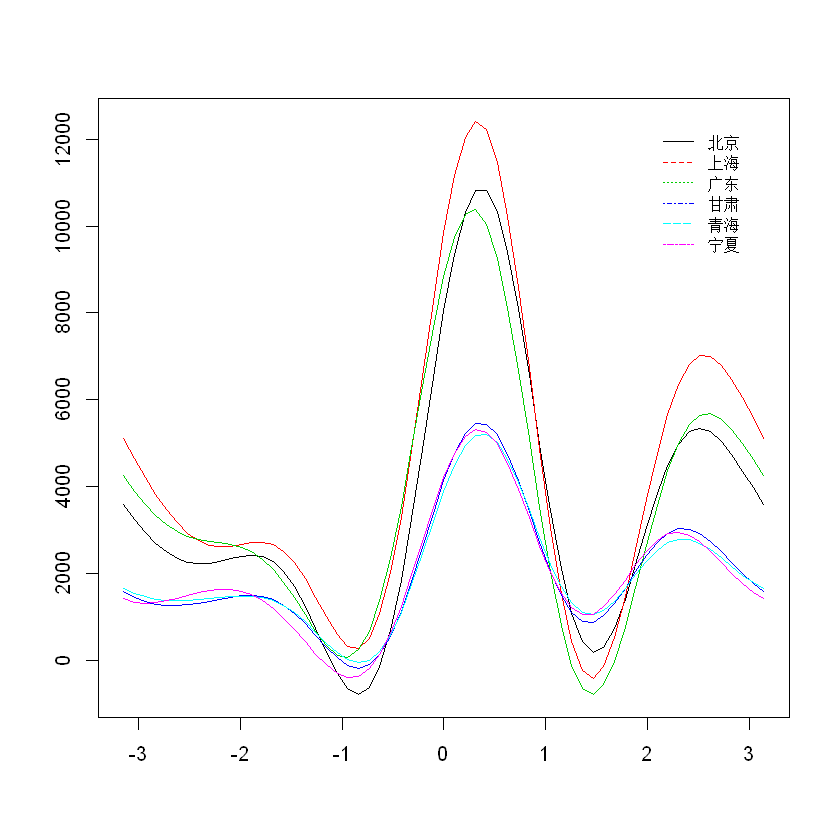

In [71]:
# 调和曲线图又称为三角多项式图，其思想是把高维空间中的一个样本点对应于二维平面上的一条曲线，同类的曲线常常拧到一起。
library("mvstats")#加载mvstats包
plot.andrews(d3.1)#绘制调和曲线图
plot.andrews(d3.1[c(1,9,19,28,29,30),])